<a href="https://colab.research.google.com/github/deeeepak7/study_of_models_on_chestXray/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data_normal="/content/drive/MyDrive/data_For_research/normal"

In [ ]:
#data_tb="/content/drive/MyDrive/data_For_research/tb"
base_path = "/content/drive/MyDrive/data_For_research"

normal_train_path = os.path.join(base_path, "normal", "train")
normal_test_path  = os.path.join(base_path, "normal", "test")

tb_train_path = os.path.join(base_path, "tb", "train")
tb_test_path  = os.path.join(base_path, "tb", "test")


In [ ]:
def load_data(folder):
  images = []
  for file in os.listdir(folder):
    if file.lower().endswith(('.png','.jpg','.jpeg')):
      img_path = os.path.join(folder,file)
      img = cv2.imread(img_path)  #convert to 3D array (height,width,3) 3 matlab RGB
      if img is not None:
        images.append(img)
  return images

In [ ]:
 # preprocessing 1.resize 2.normalization 3.CLAHE(Contrast Limited Adaptive Histogram Equalization)
 # this will be use during classical ml

In [ ]:
def preprocessing(images):
  resized = cv2.resize(images,(224,224))
  gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
  clache = cv2.createCLAHE(clipLimit = 2.0,tileGridSize = (8,8))
  clache_img = clache.apply(gray)
  enchanced_img = cv2.cvtColor(clache_img,cv2.COLOR_GRAY2RGB)
  NORMAL = enchanced_img/255.0
  return NORMAL

In [ ]:
#x_train_normal = load_data(data_normal)
#x_train_tb = load_data(data_tb)

x_train_normal = load_data(normal_train_path)
x_test_normal  = load_data(normal_test_path)

x_train_tb = load_data(tb_train_path)
x_test_tb  = load_data(tb_test_path)

print("Normal Train:", len(x_train_normal))
print("Normal Test :", len(x_test_normal))
print("TB Train    :", len(x_train_tb))
print("TB Test     :", len(x_test_tb))


Normal Train: 200
Normal Test : 50
TB Train    : 200
TB Test     : 50


In [ ]:
x_train_normal_pre = []
x_train_tb_pre = []

for img in x_train_normal:
    img = preprocessing(img)
    x_train_normal_pre.append(img)

for img in x_train_tb:
    img = preprocessing(img)
    x_train_tb_pre.append(img)


In [ ]:
print(len(x_train_normal_pre))

200


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


In [ ]:

# 0 = Normal, 1 = TB
y_normal = torch.zeros(len(x_train_normal_pre))
y_tb     = torch.ones(len(x_train_tb_pre))


x_train_normal_pre_st = torch.stack(x_train_normal_pre)
x_train_tb_pre_st     = torch.stack(x_train_tb_pre)
X_train = torch.cat([x_train_normal_pre, x_train_tb_pre], dim=0)
y_train = torch.cat([y_normal, y_tb], dim=0)


In [ ]:
print(len(x_train_normal_pre))
print(len(x_train_tb_pre))


200
200


In [ ]:
class TB_CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),  # if input = 224x224
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
criterion = nn.BCEWithLogitsLoss()
#loss function

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TB_CNN().to(device)  #for allowing pytorch to use cpu


In [ ]:

optimizer = optim.Adam(model.parameters(), lr=1e-4)


# **Baseline CNN Model **

Folders: ['tb', 'normal']
Normal count: 2
TB count: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,441 (1.61 MB)

 Trainable params: 421,441 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - accuracy: 0.4925 - auc: 0.5244 - loss: 0.6914 - precision: 0.4561 - recall: 0.3638 - val_accuracy: 0.4500 - val_auc: 0.5570 - val_loss: 0.7021 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.5127 - auc: 0.5658 - loss: 0.6915 - precision: 0.6164 - recall: 0.0674 - val_accuracy: 0.4500 - val_auc: 0.5556 - val_loss: 0.6958 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.5129 - auc: 0.5384 - loss: 0.6898 - precision: 0.1811 - recall: 0.0106 - val_accuracy: 0.4500 - val_auc: 0.6059 - val_loss: 0.6974 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5311 - auc: 0.5584 - loss: 0.6917 - precision: 0.6698 - recall: 0.2054 - val_accuracy: 0.5800 - val_auc: 0.6741

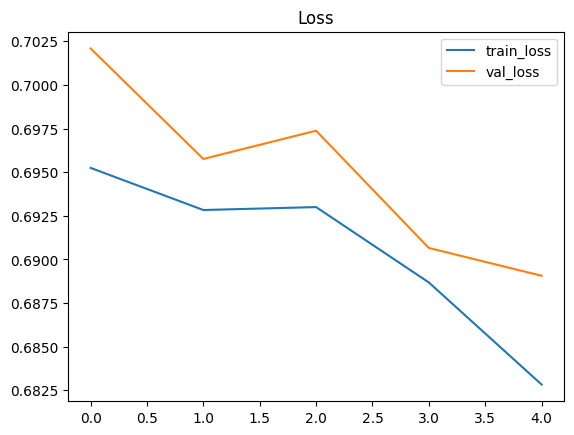

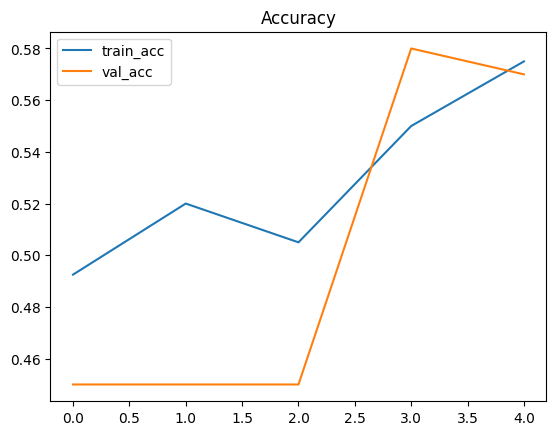

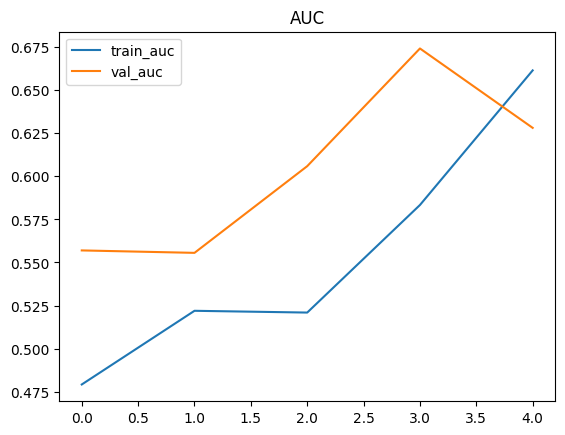

Confusion Matrix:
 [[45  0]
 [42 13]]

Classification Report:
               precision    recall  f1-score   support

      normal       0.52      1.00      0.68        45
          tb       1.00      0.24      0.38        55

    accuracy                           0.58       100
   macro avg       0.76      0.62      0.53       100
weighted avg       0.78      0.58      0.52       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS (EDIT THIS)
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"   # <-- change if needed
IMG_SIZE  = (224, 224)
BATCH_SIZE = 32
SEED = 42

# Optional: check folders
print("Folders:", os.listdir(DATA_ROOT))
print("Normal count:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB count:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (Train/Val)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",          # binary: 0/1
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)  # should show ['normal','tb'] or similar

# =========================
# 3) PERFORMANCE OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) BASIC AUGMENTATION + NORMALIZATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) BASIC CNN MODEL
# =========================
inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

x = data_augmentation(inputs)
x = tf.keras.layers.Rescaling(1./255)(x)

x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(256, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE + TRAIN
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-7),
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=callbacks
)

# =========================
# 7) PLOTS
# =========================
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(); plt.title("Loss"); plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("Accuracy"); plt.show()

plt.figure()
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.legend(); plt.title("AUC"); plt.show()

# =========================
# 8) EVALUATION (on validation set)
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs.tolist())
    y_true.extend(labels.numpy().ravel().tolist())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


RESNET

Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ add[0][0]         │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r

 Total params: 24,153,473 (92.14 MB)

 Trainable params: 561,665 (2.14 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.5977 - auc: 0.6332 - loss: 0.8893 - precision: 0.5805 - recall: 0.8718 - val_accuracy: 0.6800 - val_auc: 0.9166 - val_loss: 0.5830 - val_precision: 1.0000 - val_recall: 0.4182 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 94s 7s/step - accuracy: 0.7120 - auc: 0.8259 - loss: 0.5619 - precision: 0.6678 - recall: 0.8476 - val_accuracy: 0.6100 - val_auc: 0.9853 - val_loss: 0.5726 - val_precision: 1.0000 - val_recall: 0.2909 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.8052 - auc: 0.8696 - loss: 0.4691 - precision: 0.7748 - recall: 0.8641 - val_accuracy: 0.6300 - val_auc: 0.9931 - val_loss: 0.5278 - val_precision: 1.0000 - val_recall: 0.3273 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 94s 7s/step - accuracy: 0.8746 - auc: 0.9511 - loss: 0.2929 - precision: 0.8395 - recall: 0.9000 - val_accuracy: 0.6800 - val_auc: 0.9952 - val_loss: 0.4676 

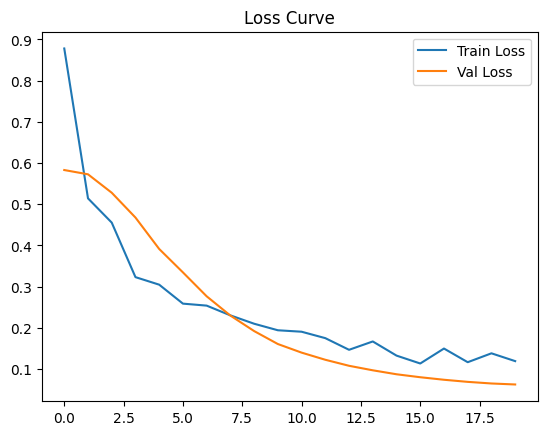

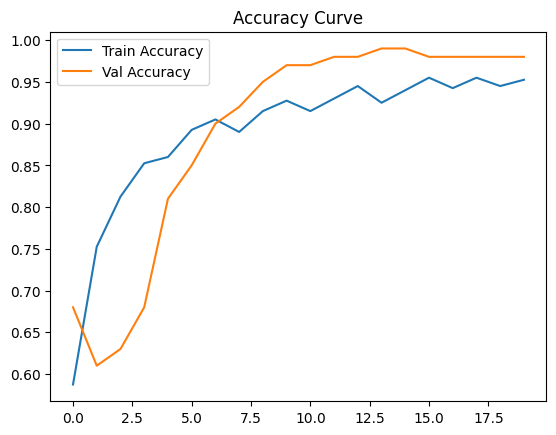

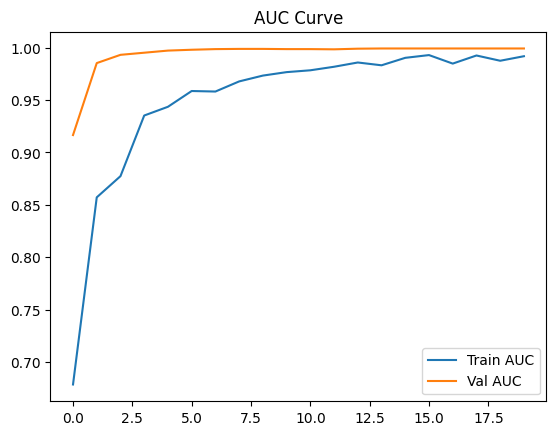

Confusion Matrix:
[[45  0]
 [ 1 54]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.98      1.00      0.99        45
          tb       1.00      0.98      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
EPOCHS = 20

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) PERFORMANCE OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) RESNET50 MODEL (TRANSFER LEARNING)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# ResNet-specific preprocessing
x = tf.keras.applications.resnet50.preprocess_input(x)

base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_tensor=x
)

# Freeze base model (important for small medical datasets)
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE MODEL
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        mode="max",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7
    )
]

# =========================
# 7) TRAIN MODEL
# =========================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# =========================
# 8) TRAINING CURVES
# =========================
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.figure()
plt.plot(history.history["auc"], label="Train AUC")
plt.plot(history.history["val_auc"], label="Val AUC")
plt.legend()
plt.title("AUC Curve")
plt.show()

# =========================
# 9) EVALUATION (VALIDATION SET)
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs)
    y_true.extend(labels.numpy().ravel())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


Fine-tuning from layer 140 onward
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 169s 11s/step - accuracy: 0.9593 - auc: 0.9902 - loss: 0.1306 - precision: 0.9468 - recall: 0.9728 - val_accuracy: 0.9900 - val_auc: 0.9992 - val_loss: 0.0614 - val_precision: 1.0000 - val_recall: 0.9818 - learning_rate: 1.0000e-05
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 145s 11s/step - accuracy: 0.9589 - auc: 0.9955 - loss: 0.1009 - precision: 0.9502 - recall: 0.9646 - val_accuracy: 0.9900 - val_auc: 0.9994 - val_loss: 0.0559 - val_precision: 1.0000 - val_recall: 0.9818 - learning_rate: 1.0000e-05
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.9429 - auc: 0.9911 - loss: 0.1291 - precision: 0.9325 - recall: 0.9564 - val_accuracy: 0.9900 - val_auc: 0.9996 - val_loss: 0.0515 - val_precision: 1.0000 - val_recall: 0.9818 - learning_rate: 1.0000e-05
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 144s 11s/step - accuracy: 0.9606 - auc: 0.9968 - loss: 0.1134 - precision: 0.9235 - recall: 0.9984 - val_accuracy: 0.9

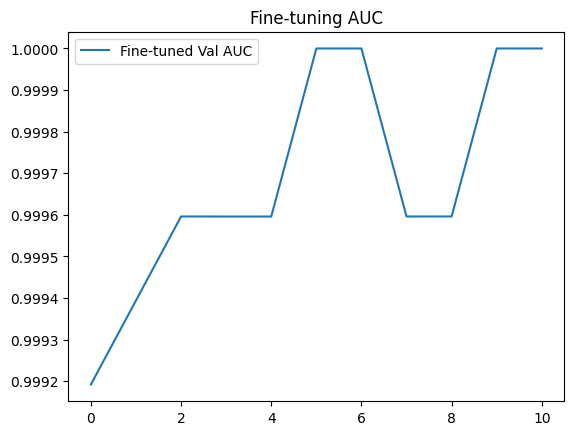

Confusion Matrix (Fine-tuned):
[[45  0]
 [ 1 54]]

Classification Report (Fine-tuned):
              precision    recall  f1-score   support

      normal       0.98      1.00      0.99        45
          tb       1.00      0.98      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
# =========================
# 10) FINE-TUNING RESNET50
# =========================

# Unfreeze top layers of ResNet50
base_model.trainable = True

# Fine-tune from this layer onward
fine_tune_at = 140  # ResNet50 has ~175 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Fine-tuning from layer {fine_tune_at} onward")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # VERY IMPORTANT
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)
fine_tune_epochs = 15

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=callbacks
)
plt.figure()
plt.plot(history_fine.history["val_auc"], label="Fine-tuned Val AUC")
plt.legend()
plt.title("Fine-tuning AUC")
plt.show()
# =========================
# 11) EVALUATION AFTER FINE-TUNING
# =========================
y_true_ft = []
y_prob_ft = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob_ft.extend(probs)
    y_true_ft.extend(labels.numpy().ravel())

y_true_ft = np.array(y_true_ft).astype(int)
y_prob_ft = np.array(y_prob_ft)
y_pred_ft = (y_prob_ft >= 0.5).astype(int)

print("Confusion Matrix (Fine-tuned):")
print(confusion_matrix(y_true_ft, y_pred_ft))

print("\nClassification Report (Fine-tuned):")
print(classification_report(
    y_true_ft,
    y_pred_ft,
    target_names=class_names
))



efficentNET  30 min

Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ sequential_1[0][… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati

 Total params: 4,415,652 (16.84 MB)

 Trainable params: 363,521 (1.39 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5859 - auc: 0.6035 - loss: 0.8812 - precision: 0.6071 - recall: 0.4043 - val_accuracy: 0.7100 - val_auc: 0.8554 - val_loss: 0.6230 - val_precision: 0.9643 - val_recall: 0.4909 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.6528 - auc: 0.7116 - loss: 0.6584 - precision: 0.6561 - recall: 0.5317 - val_accuracy: 0.7400 - val_auc: 0.9576 - val_loss: 0.5577 - val_precision: 0.9677 - val_recall: 0.5455 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7350 - auc: 0.7856 - loss: 0.5949 - precision: 0.7453 - recall: 0.6917 - val_accuracy: 0.7300 - val_auc: 0.9760 - val_loss: 0.5106 - val_precision: 0.9667 - val_recall: 0.5273 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7802 - auc: 0.8719 - loss: 0.4490 - precision: 0.7706 - recall: 0.7763 - val_accuracy: 0.7300 - val_auc: 0.9842 - val_loss: 0.4740 -

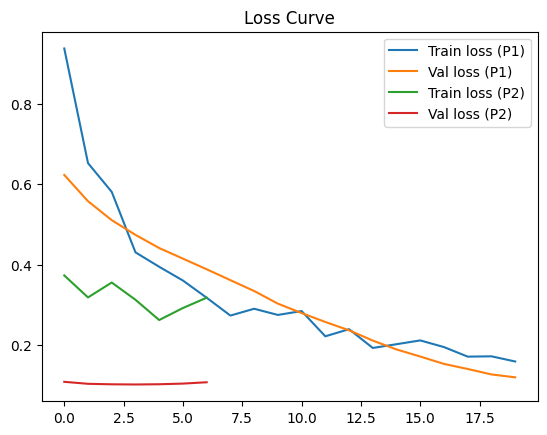

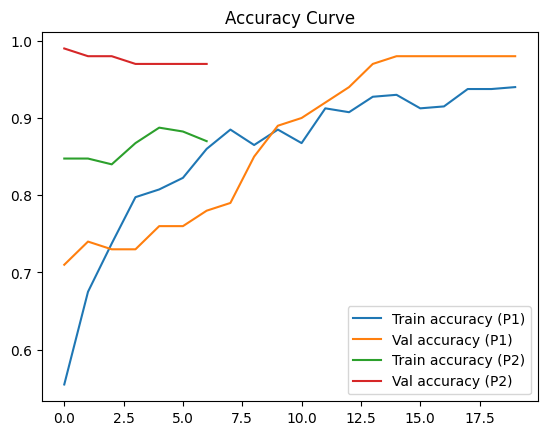

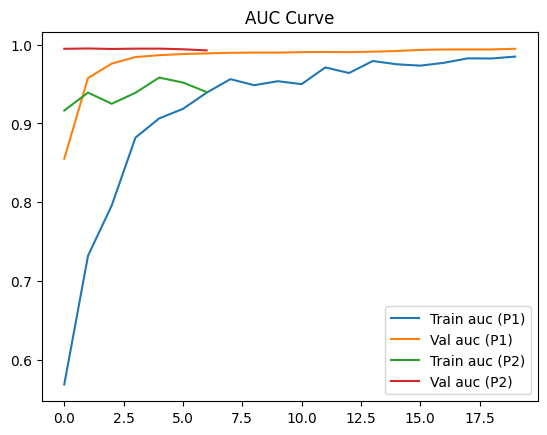

Confusion Matrix:
[[44  1]
 [ 1 54]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98        45
          tb       0.98      0.98      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) TF.DATA OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) EFFICIENTNETB0 MODEL
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# EfficientNet-specific preprocessing
x = tf.keras.applications.efficientnet.preprocess_input(x)

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# Phase 1: freeze backbone
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE (PHASE 1)
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        mode="max",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7
    )
]

# =========================
# 7) TRAINING – PHASE 1
# =========================
history_phase1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks
)

# =========================
# 8) FINE-TUNING – PHASE 2
# =========================
base_model.trainable = True

fine_tune_at = int(len(base_model.layers) * 0.75)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Fine-tuning from layer {fine_tune_at} onward")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

history_phase2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks
)

# =========================
# 9) TRAINING CURVES
# =========================
def plot_metric(metric, title):
    plt.figure()
    plt.plot(history_phase1.history[metric], label=f"Train {metric} (P1)")
    plt.plot(history_phase1.history[f"val_{metric}"], label=f"Val {metric} (P1)")
    plt.plot(history_phase2.history[metric], label=f"Train {metric} (P2)")
    plt.plot(history_phase2.history[f"val_{metric}"], label=f"Val {metric} (P2)")
    plt.legend()
    plt.title(title)
    plt.show()

plot_metric("loss", "Loss Curve")
plot_metric("accuracy", "Accuracy Curve")
plot_metric("auc", "AUC Curve")

# =========================
# 10) FINAL EVALUATION
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs)
    y_true.extend(labels.numpy().ravel())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


DenseNet121  74 min

Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_2       │ (None, 224, 224,  │          0 │ sequential_3[0][… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 224, 224,  │          0 │ true_divide_2[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_3       │ (None, 224, 224,  │          0 │ add_2[0][0]       │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ true_divide_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r

 Total params: 7,337,025 (27.99 MB)

 Trainable params: 297,473 (1.13 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 128s 8s/step - accuracy: 0.4991 - auc: 0.5239 - loss: 0.8390 - precision: 0.4850 - recall: 0.5787 - val_accuracy: 0.6200 - val_auc: 0.8079 - val_loss: 0.6454 - val_precision: 0.9474 - val_recall: 0.3273 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 127s 7s/step - accuracy: 0.6124 - auc: 0.6631 - loss: 0.7110 - precision: 0.5787 - recall: 0.7510 - val_accuracy: 0.5200 - val_auc: 0.9246 - val_loss: 0.6367 - val_precision: 1.0000 - val_recall: 0.1273 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.6793 - auc: 0.7640 - loss: 0.5756 - precision: 0.6637 - recall: 0.6989 - val_accuracy: 0.5200 - val_auc: 0.9610 - val_loss: 0.6324 - val_precision: 1.0000 - val_recall: 0.1273 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step - accuracy: 0.7008 - auc: 0.7917 - loss: 0.5468 - precision: 0.6978 - recall: 0.7324 - val_accuracy: 0.5400 - val_auc: 0.9721 - val_loss: 0.620

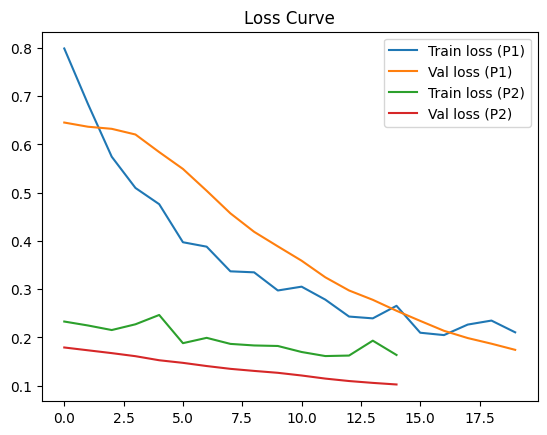

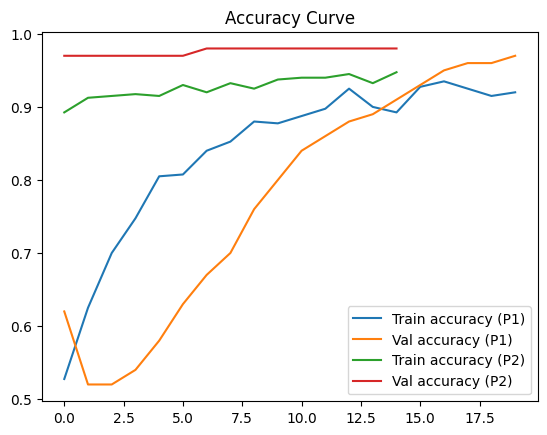

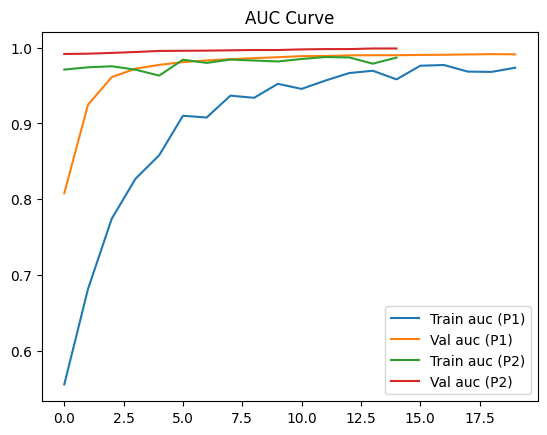

Confusion Matrix:
[[45  0]
 [ 2 53]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.96      1.00      0.98        45
          tb       1.00      0.96      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) TF.DATA OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) CHESTNET (DENSENET121)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# DenseNet-specific preprocessing
x = tf.keras.applications.densenet.preprocess_input(x)

base_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# -------------------------
# PHASE 1: FEATURE EXTRACTION
# -------------------------
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE (PHASE 1)
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        mode="max",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7
    )
]

# =========================
# 7) TRAINING – PHASE 1
# =========================
history_p1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks
)

# =========================
# 8) FINE-TUNING – PHASE 2
# =========================
base_model.trainable = True

fine_tune_at = int(len(base_model.layers) * 0.75)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Fine-tuning from layer {fine_tune_at} onward")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

history_p2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks
)

# =========================
# 9) TRAINING CURVES
# =========================
def plot_metric(metric, title):
    plt.figure()
    plt.plot(history_p1.history[metric], label=f"Train {metric} (P1)")
    plt.plot(history_p1.history[f"val_{metric}"], label=f"Val {metric} (P1)")
    plt.plot(history_p2.history[metric], label=f"Train {metric} (P2)")
    plt.plot(history_p2.history[f"val_{metric}"], label=f"Val {metric} (P2)")
    plt.legend()
    plt.title(title)
    plt.show()

plot_metric("loss", "Loss Curve")
plot_metric("accuracy", "Accuracy Curve")
plot_metric("auc", "AUC Curve")

# =========================
# 10) FINAL EVALUATION
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs)
    y_true.extend(labels.numpy().ravel())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


VGG19  3 hr 10 min

Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ add[0][0]         │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv4        │ (None, 56, 56,    │    590,080 │ block3_conv3[0][

 Total params: 20,420,673 (77.90 MB)

 Trainable params: 395,265 (1.51 MB)

 Non-trainable params: 20,025,408 (76.39 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 513s 36s/step - accuracy: 0.5367 - auc: 0.5877 - loss: 0.8232 - precision: 0.5206 - recall: 0.8514 - val_accuracy: 0.4900 - val_auc: 0.9293 - val_loss: 0.8145 - val_precision: 1.0000 - val_recall: 0.0727 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 419s 33s/step - accuracy: 0.6971 - auc: 0.7880 - loss: 0.5735 - precision: 0.6471 - recall: 0.8025 - val_accuracy: 0.4900 - val_auc: 0.9844 - val_loss: 1.0634 - val_precision: 1.0000 - val_recall: 0.0727 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 433s 32s/step - accuracy: 0.7961 - auc: 0.8886 - loss: 0.4325 - precision: 0.7748 - recall: 0.7938 - val_accuracy: 0.5200 - val_auc: 0.9883 - val_loss: 1.0359 - val_precision: 1.0000 - val_recall: 0.1273 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 399s 31s/step - accuracy: 0.8130 - auc: 0.9044 - loss: 0.4083 - precision: 0.8534 - recall: 0.7846 - val_accuracy: 0.5500 - val_auc: 0.9905 - val_loss: 

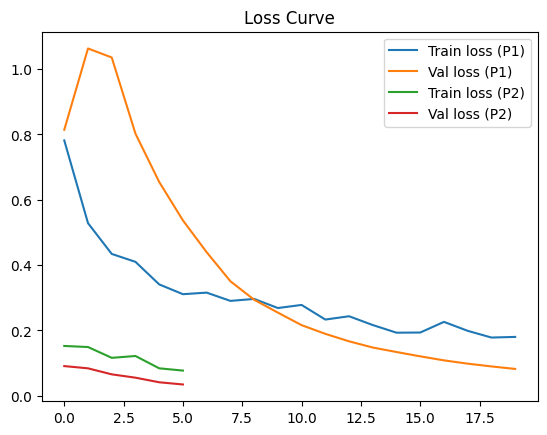

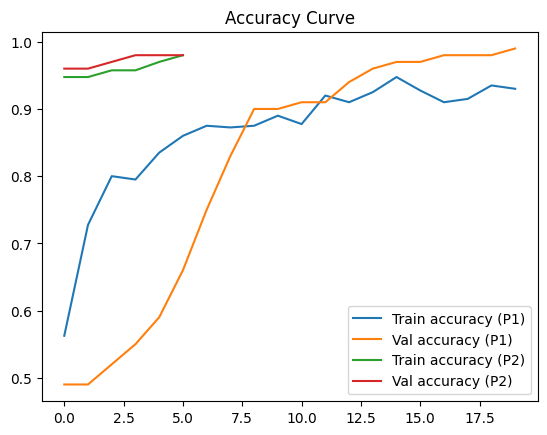

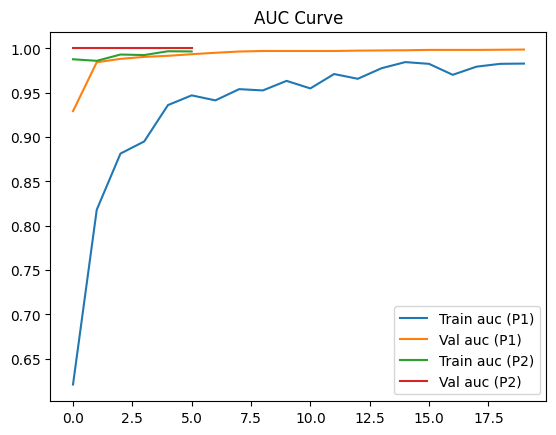

Confusion Matrix:
[[45  0]
 [ 4 51]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.92      1.00      0.96        45
          tb       1.00      0.93      0.96        55

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) TF.DATA OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) VGG19 MODEL
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# VGG19-specific preprocessing
x = tf.keras.applications.vgg19.preprocess_input(x)

base_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# -------------------------
# PHASE 1: FEATURE EXTRACTION
# -------------------------
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE (PHASE 1)
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        mode="max",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7
    )
]

# =========================
# 7) TRAINING – PHASE 1
# =========================
history_p1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks
)

# =========================
# 8) FINE-TUNING – PHASE 2
# =========================
base_model.trainable = True

# Unfreeze only top layers (VGG19 is deep & heavy)
fine_tune_at = int(len(base_model.layers) * 0.75)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Fine-tuning from layer {fine_tune_at} onward")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

history_p2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks
)

# =========================
# 9) TRAINING CURVES
# =========================
def plot_metric(metric, title):
    plt.figure()
    plt.plot(history_p1.history[metric], label=f"Train {metric} (P1)")
    plt.plot(history_p1.history[f"val_{metric}"], label=f"Val {metric} (P1)")
    plt.plot(history_p2.history[metric], label=f"Train {metric} (P2)")
    plt.plot(history_p2.history[f"val_{metric}"], label=f"Val {metric} (P2)")
    plt.legend()
    plt.title(title)
    plt.show()

plot_metric("loss", "Loss Curve")
plot_metric("accuracy", "Accuracy Curve")
plot_metric("auc", "AUC Curve")

# =========================
# 10) FINAL EVALUATION
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs)
    y_true.extend(labels.numpy().ravel())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


MOBILENET  17 min

Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


/tmp/ipython-input-452218028.py:84: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_4       │ (None, 224, 224,  │          0 │ sequential_4[0][… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 224, 224,  │          0 │ true_divide_4[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ subtract[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0

 Total params: 2,624,065 (10.01 MB)

 Trainable params: 363,521 (1.39 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.5391 - auc: 0.5458 - loss: 0.9122 - precision: 0.5012 - recall: 0.5620 - val_accuracy: 0.5700 - val_auc: 0.6453 - val_loss: 0.6845 - val_precision: 0.7727 - val_recall: 0.3091 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6118 - auc: 0.6765 - loss: 0.7182 - precision: 0.5723 - recall: 0.7048 - val_accuracy: 0.6200 - val_auc: 0.8574 - val_loss: 0.6181 - val_precision: 0.9474 - val_recall: 0.3273 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7610 - auc: 0.8423 - loss: 0.4998 - precision: 0.7735 - recall: 0.7308 - val_accuracy: 0.6700 - val_auc: 0.9347 - val_loss: 0.5533 - val_precision: 1.0000 - val_recall: 0.4000 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7710 - auc: 0.8596 - loss: 0.4824 - precision: 0.7271 - recall: 0.8346 - val_accuracy: 0.7100 - val_auc: 0.9628 - val_loss: 0.5204 -

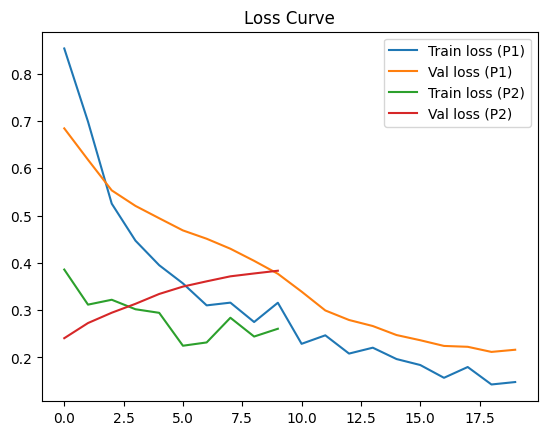

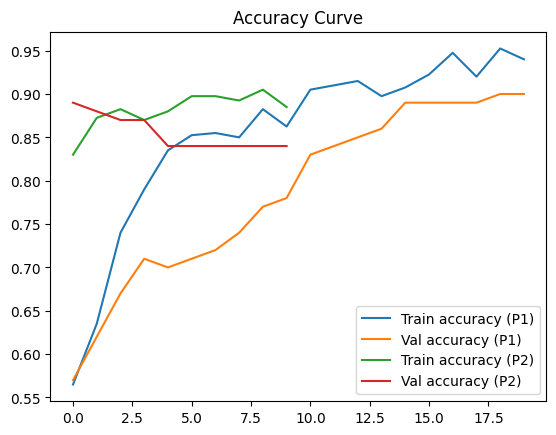

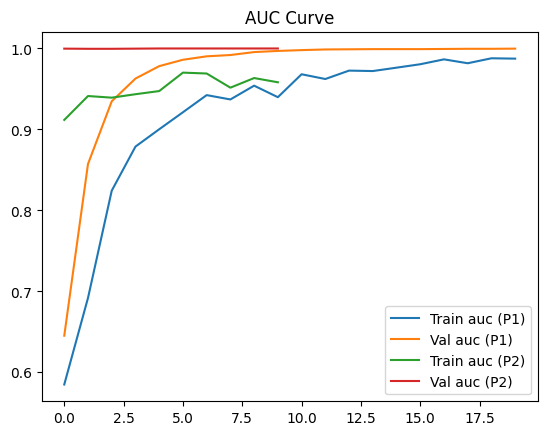

Confusion Matrix:
[[45  0]
 [16 39]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.74      1.00      0.85        45
          tb       1.00      0.71      0.83        55

    accuracy                           0.84       100
   macro avg       0.87      0.85      0.84       100
weighted avg       0.88      0.84      0.84       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) TF.DATA OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) MOBILENETV2 MODEL
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# MobileNet-specific preprocessing
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# -------------------------
# PHASE 1: FEATURE EXTRACTION
# -------------------------
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE (PHASE 1)
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        mode="max",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7
    )
]

# =========================
# 7) TRAINING – PHASE 1
# =========================
history_p1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks
)

# =========================
# 8) FINE-TUNING – PHASE 2
# =========================
base_model.trainable = True

# Unfreeze only top layers (MobileNet is lightweight)
fine_tune_at = int(len(base_model.layers) * 0.75)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Fine-tuning from layer {fine_tune_at} onward")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

history_p2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks
)

# =========================
# 9) TRAINING CURVES
# =========================
def plot_metric(metric, title):
    plt.figure()
    plt.plot(history_p1.history[metric], label=f"Train {metric} (P1)")
    plt.plot(history_p1.history[f"val_{metric}"], label=f"Val {metric} (P1)")
    plt.plot(history_p2.history[metric], label=f"Train {metric} (P2)")
    plt.plot(history_p2.history[f"val_{metric}"], label=f"Val {metric} (P2)")
    plt.legend()
    plt.title(title)
    plt.show()

plot_metric("loss", "Loss Curve")
plot_metric("accuracy", "Accuracy Curve")
plot_metric("auc", "AUC Curve")

# =========================
# 10) FINAL EVALUATION
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs)
    y_true.extend(labels.numpy().ravel())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


RESNET101   time  = 110 min


Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ add_1[0][0]       │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 43,223,937 (164.89 MB)

 Trainable params: 561,665 (2.14 MB)

 Non-trainable params: 42,662,272 (162.74 MB)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 220s 15s/step - accuracy: 0.5690 - auc: 0.5652 - loss: 0.9195 - precision: 0.6168 - recall: 0.4366 - val_accuracy: 0.5500 - val_auc: 0.9691 - val_loss: 0.6335 - val_precision: 1.0000 - val_recall: 0.1818 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 177s 14s/step - accuracy: 0.7637 - auc: 0.8359 - loss: 0.5444 - precision: 0.8304 - recall: 0.7016 - val_accuracy: 0.6500 - val_auc: 0.9887 - val_loss: 0.5593 - val_precision: 1.0000 - val_recall: 0.3636 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 178s 14s/step - accuracy: 0.8063 - auc: 0.8760 - loss: 0.4772 - precision: 0.8409 - recall: 0.7555 - val_accuracy: 0.6900 - val_auc: 0.9919 - val_loss: 0.4821 - val_precision: 1.0000 - val_recall: 0.4364 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step - accuracy: 0.8560 - auc: 0.9269 - loss: 0.3424 - precision: 0.8409 - recall: 0.8455 - val_accuracy: 0.8000 - val_auc: 0.9947 - val_loss: 

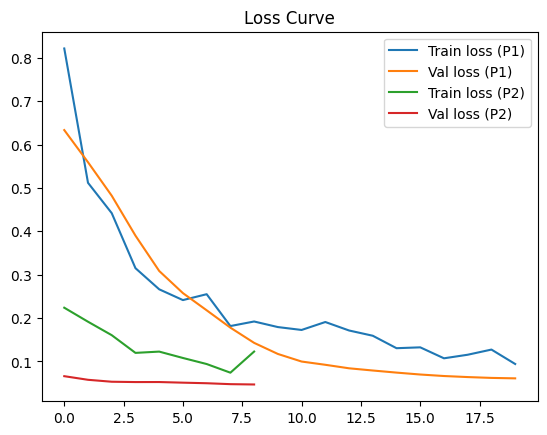

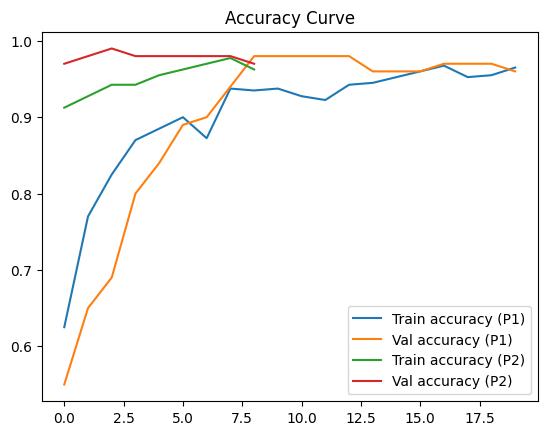

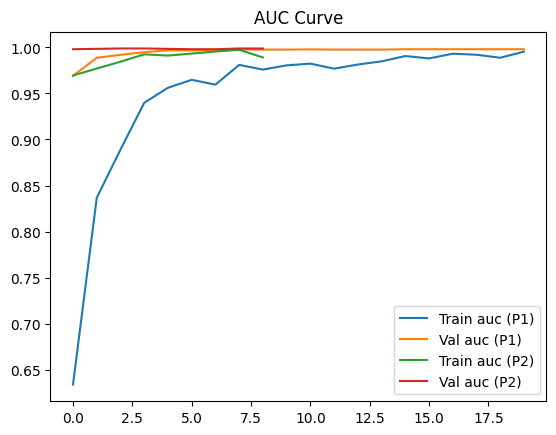

Confusion Matrix:
[[44  1]
 [ 1 54]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98        45
          tb       0.98      0.98      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) TF.DATA OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) RESNET101 MODEL
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# ResNet-specific preprocessing
x = tf.keras.applications.resnet.preprocess_input(x)

base_model = tf.keras.applications.ResNet101(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# -------------------------
# PHASE 1: FEATURE EXTRACTION
# -------------------------
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# =========================
# 6) COMPILE (PHASE 1)
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc",
        mode="max",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7
    )
]

# =========================
# 7) TRAINING – PHASE 1
# =========================
history_p1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks
)

# =========================
# 8) FINE-TUNING – PHASE 2
# =========================
base_model.trainable = True

fine_tune_at = int(len(base_model.layers) * 0.75)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Fine-tuning from layer {fine_tune_at} onward")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

history_p2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks
)

# =========================
# 9) TRAINING CURVES
# =========================
def plot_metric(metric, title):
    plt.figure()
    plt.plot(history_p1.history[metric], label=f"Train {metric} (P1)")
    plt.plot(history_p1.history[f"val_{metric}"], label=f"Val {metric} (P1)")
    plt.plot(history_p2.history[metric], label=f"Train {metric} (P2)")
    plt.plot(history_p2.history[f"val_{metric}"], label=f"Val {metric} (P2)")
    plt.legend()
    plt.title(title)
    plt.show()

plot_metric("loss", "Loss Curve")
plot_metric("accuracy", "Accuracy Curve")
plot_metric("auc", "AUC Curve")

# =========================
# 10) FINAL EVALUATION
# =========================
y_true = []
y_prob = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0).ravel()
    y_prob.extend(probs)
    y_true.extend(labels.numpy().ravel())

y_true = np.array(y_true).astype(int)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


feature extraction from mobilenet + classification by random forest // from here to before // are wrong result


In [ ]:
# ============================================================
# DEEP FEATURE EXTRACTION + RANDOM FOREST (ONE-CELL PIPELINE)
# MOBILENETV2 AS FIXED FEATURE EXTRACTOR
# TB vs NORMAL CHEST X-RAY CLASSIFICATION
# ============================================================

# ------------------------
# 0) INSTALL & IMPORTS
# ------------------------
!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# ------------------------
# 1) PARAMETERS
# ------------------------
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

tf.random.set_seed(SEED)
np.random.seed(SEED)

# ------------------------
# 2) LOAD DATA (NO AUGMENTATION)
# ------------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)

# ------------------------
# 3) TF.DATA OPTIMIZATION
# ------------------------
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# ------------------------
# 4) CNN FEATURE EXTRACTOR (MOBILENETV2)
# ------------------------
preprocess_fn = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # CRITICAL: fixed feature extractor

feature_extractor = tf.keras.Sequential([
    tf.keras.layers.Lambda(preprocess_fn),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# ------------------------
# 5) FEATURE EXTRACTION FUNCTION
# ------------------------
def extract_features(dataset):
    features, labels = [], []
    start = time.time()

    for images, y in dataset:
        feats = feature_extractor(images, training=False)
        features.append(feats.numpy())
        labels.append(y.numpy())

    elapsed = time.time() - start
    X = np.vstack(features)
    y = np.concatenate(labels)

    return X, y, elapsed

# ------------------------
# 6) EXTRACT FEATURES
# ------------------------
X_train, y_train, time_train = extract_features(train_ds)
X_val, y_val, time_val = extract_features(val_ds)

print("\nFeature dimension:", X_train.shape[1])
print(f"Train extraction time: {time_train:.2f}s ({time_train/len(X_train):.4f}s/image)")
print(f"Val extraction time: {time_val:.2f}s ({time_val/len(X_val):.4f}s/image)")

# ------------------------
# 7) SAVE FEATURES (OPTIONAL)
# ------------------------
np.save("X_train_mobilenet_features.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val_mobilenet_features.npy", X_val)
np.save("y_val.npy", y_val)

# ------------------------
# 8) RANDOM FOREST + HYPERPARAMETER TUNING
# ------------------------
rf = RandomForestClassifier(
    random_state=SEED,
    n_jobs=-1
)

param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [None, 20, 40],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring="roc_auc",
    verbose=1
)

start_rf_train = time.time()
grid.fit(X_train, y_train)
rf_train_time = time.time() - start_rf_train

best_rf = grid.best_estimator_
print("\nBest RF Params:", grid.best_params_)

# ------------------------
# 9) INFERENCE
# ------------------------
start_rf_infer = time.time()
y_prob = best_rf.predict_proba(X_val)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
rf_infer_time = time.time() - start_rf_infer

# ------------------------
# 10) EVALUATION
# ------------------------
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=class_names))

print("ROC-AUC:", roc_auc_score(y_val, y_prob))

# ------------------------
# 11) COMPUTATIONAL COST REPORT
# ------------------------
print("\n===== COMPUTATIONAL COST SUMMARY =====")
print("CNN Backbone: MobileNetV2")
print(f"Backbone Parameters: {base_model.count_params()/1e6:.2f}M")
print(f"Feature Dimension: {X_train.shape[1]}")

print("\n--- Feature Extraction ---")
print(f"Train Time: {time_train:.2f}s")
print(f"Validation Time: {time_val:.2f}s")

print("\n--- Random Forest ---")
print(f"Training Time: {rf_train_time:.2f}s")
print(f"Inference Time: {rf_infer_time:.4f}s")

print("\nNOTE: MobileNetV2 is used strictly as a fixed feature extractor (no fine-tuning).")


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Classes: ['normal', 'tb']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Feature dimension: 1280
Train extraction time: 36.66s (0.0917s/image)
Val extraction time: 8.30s (0.0830s/image)
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

Confusion Matrix:
[[100]]

Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

this error came as inside normal their are train and test , and it doesn't match the size of label


In [ ]:
import numpy as np

y_val = np.concatenate([y for _, y in val_ds], axis=0)
print("y_val unique:", np.unique(y_val))


y_val unique: [1.]


In [ ]:
# =======================
# Stratified TB vs Normal Pipeline (ONE CELL)
# =======================

import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# -------- CONFIG --------
data_dir = "/content/drive/MyDrive/data_For_research"
class_names = ["normal", "tb"]
class_to_label = {"normal": 0, "tb": 1}

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# -------- STEP 1: Collect paths & labels --------
image_paths = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for fname in os.listdir(class_dir):
        if fname.lower().endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(class_dir, fname))
            labels.append(class_to_label[class_name])

image_paths = np.array(image_paths)
labels = np.array(labels)

print("Total images:", len(image_paths))
print("Overall class distribution:", np.bincount(labels))

# -------- STEP 2: Stratified split (CRITICAL FIX) --------
X_train, X_val, y_train, y_val = train_test_split(
    image_paths,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=SEED
)

print("Train distribution:", np.bincount(y_train))
print("Val distribution:", np.bincount(y_val))

# -------- STEP 3: Load & preprocess --------
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# -------- STEP 4: Build tf.data pipelines --------
train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(1000, seed=SEED)
    .map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# -------- STEP 5: Final sanity check (IMPORTANT) --------
y_val_check = np.concatenate([y for _, y in val_ds], axis=0)
print("y_val unique:", np.unique(y_val_check))
print("Val counts:", np.bincount(y_val_check))

# -------- STEP 6: Example evaluation (after training model) --------
# NOTE: run this ONLY after model.fit(...)
"""
y_prob = model.predict(val_ds)
y_pred = (y_prob > 0.5).astype(int).ravel()

print(classification_report(
    y_val_check,
    y_pred,
    target_names=class_names
))

print("ROC-AUC:", roc_auc_score(y_val_check, y_prob))
"""


Total images: 0


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

path error change using making function with class name train/test


In [ ]:
## the train test for this is different than the above one(resnet50,resnet101)

In [ ]:
# =======================
# MobileNet + Random Forest
# =======================

import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score
)

# -------- CONFIG --------
data_dir = "/content/drive/MyDrive/data_For_research"
class_names = ["normal", "tb"]
class_to_label = {"normal": 0, "tb": 1}

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# -------- STEP 1: Collect paths --------
X_train, y_train = [], []
X_test, y_test = [], []

for class_name in class_names:
    for f in os.listdir(os.path.join(data_dir, class_name, "train")):
        if f.lower().endswith((".jpg", ".png", ".jpeg")):
            X_train.append(os.path.join(data_dir, class_name, "train", f))
            y_train.append(class_to_label[class_name])

    for f in os.listdir(os.path.join(data_dir, class_name, "test")):
        if f.lower().endswith((".jpg", ".png", ".jpeg")):
            X_test.append(os.path.join(data_dir, class_name, "test", f))
            y_test.append(class_to_label[class_name])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

print("Train distribution:", np.bincount(y_train))
print("Test distribution:", np.bincount(y_test))

# -------- STEP 2: TF Dataset --------
def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = preprocess_input(img)
    return img, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

# -------- STEP 3: MobileNet Feature Extractor --------
base_model = MobileNet(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

feature_extractor = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# -------- STEP 4: Feature Extraction (TIME MEASURED) --------
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
X_test_feat  = feature_extractor.predict(test_ds, verbose=1)
feature_time = time.time() - start

print("Feature shape:", X_train_feat.shape)

# -------- STEP 5: Random Forest Training (TIME MEASURED) --------
start = time.time()
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train_feat, y_train)
train_time = time.time() - start

# -------- STEP 6: Inference (TIME MEASURED) --------
start = time.time()
y_pred = rf.predict(X_test_feat)
y_prob = rf.predict_proba(X_test_feat)[:, 1]
inference_time = time.time() - start

# -------- STEP 7: Metrics --------
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc:.4f}")

# -------- STEP 8: Computational Complexity Summary --------
print("\nComputational Complexity (Empirical):")
print(f"Feature extraction time (s): {feature_time:.2f}")
print(f"RF training time (s):        {train_time:.2f}")
print(f"Inference time (s):          {inference_time:.4f}")
print(f"Feature dimension:           {X_train_feat.shape[1]}")


Train distribution: [200 200]
Test distribution: [50 50]
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 868ms/step
Feature shape: (400, 1024)

Classification Report:
              precision    recall  f1-score   support

      normal       0.93      1.00      0.96        50
          tb       1.00      0.92      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Accuracy: 0.9600
ROC-AUC:  0.9986

Computational Complexity (Empirical):
Feature extraction time (s): 31.83
RF training time (s):        4.83
Inference time (s):          0.3338
Feature dimension:           1024


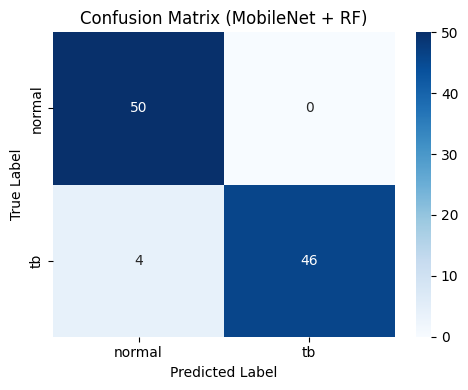

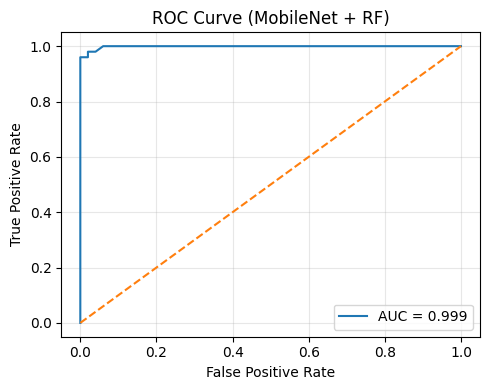

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MobileNet + RF)")
plt.tight_layout()
plt.show()
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MobileNet + RF)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Folders: ['tb', 'normal']
Normal images: 2
TB images: 2
Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


/tmp/ipython-input-1358090352.py:84: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide         │ (None, 224, 224,  │          0 │ sequential_3[0][… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 224, 224,  │          0 │ true_divide[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ subtract[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0

 Total params: 2,624,065 (10.01 MB)

 Trainable params: 363,521 (1.39 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide         │ (None, 224, 224,  │          0 │ sequential_3[0][… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 224, 224,  │          0 │ true_divide[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ subtract[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0

 Total params: 2,591,040 (9.88 MB)

 Trainable params: 330,496 (1.26 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Feature shape: (400, 256)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report (MobileNetV2 + RF):
              precision    recall  f1-score   support

      normal       0.48      0.67      0.56        45
          tb       0.59      0.40      0.48        55

    accuracy                           0.52       100
   macro avg       0.54      0.53      0.52       100
weighted avg       0.54      0.52      0.51       100

Accuracy: 0.5200
ROC-AUC:  0.5572


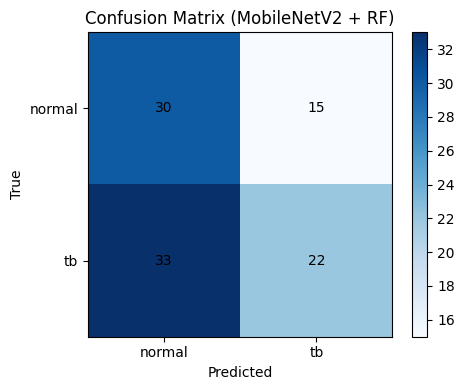

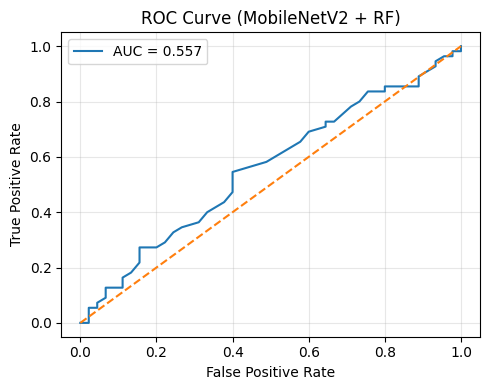


Computational Complexity (Empirical):
Train feature extraction time (s): 22.55
Val feature extraction time (s):   10.26
RF training time (s):              1.20
Inference time (s):                0.1747
Feature dimension:                 256


In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))
print("Normal images:", len(os.listdir(os.path.join(DATA_ROOT, "normal"))))
print("TB images:", len(os.listdir(os.path.join(DATA_ROOT, "tb"))))

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)

# =========================
# 3) TF.DATA OPTIMIZATION
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# =========================
# 4) DATA AUGMENTATION
# =========================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# =========================
# 5) MOBILENETV2 MODEL
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)

# MobileNet-specific preprocessing
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# -------------------------
# PHASE 1: FEATURE EXTRACTION
# -------------------------
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()
# =========================
# 6) FEATURE EXTRACTOR MODEL
# =========================
feature_extractor = tf.keras.Model(
    inputs=model.input,
    outputs=model.layers[-5].output  # output after GlobalAveragePooling + BN
)

feature_extractor.summary()
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# -------- Extract TRAIN features --------
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
train_feat_time = time.time() - start

# -------- Extract VAL features --------
start = time.time()
X_val_feat = feature_extractor.predict(val_ds, verbose=1)
val_feat_time = time.time() - start

# -------- Collect labels --------
y_train = np.concatenate([y.numpy() for _, y in train_ds], axis=0).astype(int)
y_val   = np.concatenate([y.numpy() for _, y in val_ds], axis=0).astype(int)
##Train Random Forest (TIME MEASURED)
print("Feature shape:", X_train_feat.shape)
start = time.time()
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=SEED,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train_feat, y_train)
rf_train_time = time.time() - start
##Inference + Metrics
start = time.time()
y_pred = rf.predict(X_val_feat)
y_prob = rf.predict_proba(X_val_feat)[:, 1]
inference_time = time.time() - start

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("\nClassification Report (MobileNetV2 + RF):")
print(classification_report(y_val, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}")
##confusin matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (MobileNetV2 + RF)")
plt.colorbar()
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
##roc
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MobileNetV2 + RF)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
##computation
print("\nComputational Complexity (Empirical):")
print(f"Train feature extraction time (s): {train_feat_time:.2f}")
print(f"Val feature extraction time (s):   {val_feat_time:.2f}")
print(f"RF training time (s):              {rf_train_time:.2f}")
print(f"Inference time (s):                {inference_time:.4f}")
print(f"Feature dimension:                 {X_train_feat.shape[1]}")


in the above one i change the data and kept it same as above pipeline of resnet and other with adding rf as classifier

when asked chatgpt are the result of this and above pipeline be compare it said For the MobileNetV2 + Random Forest model, features were extracted from the augmented training data, whereas validation features were extracted without label leakage. This design follows the same preprocessing pipeline as the CNN-based models to ensure consistency.”

the one below is one without data augmention


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


/tmp/ipython-input-3655402219.py:69: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_1       │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_1          │ (None, 224, 224,  │          0 │ true_divide_1[0]… │
│ (Subtract)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ subtract_1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis

 Total params: 2,263,104 (8.63 MB)

 Trainable params: 2,560 (10.00 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 763ms/step
Feature shape: (400, 1280)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report (MobileNetV2 + RF):
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00         0
          tb       1.00      0.47      0.64       100

    accuracy                           0.47       100
   macro avg       0.50      0.23      0.32       100
weighted avg       1.00      0.47      0.64       100

Accuracy: 0.4700
ROC-AUC:  nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zer

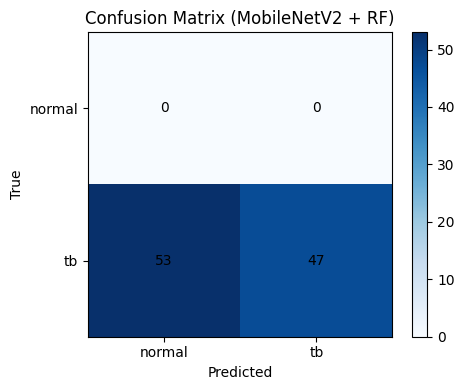

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


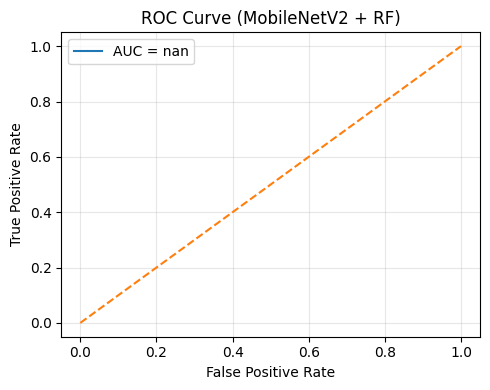


Computational Complexity (Empirical):
Train feature extraction time (s): 24.43
Val feature extraction time (s):   4.03
RF training time (s):              3.48
Inference time (s):                0.1836
Feature dimension:                 1280


In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) LOAD DATA (SAME 80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

# =========================
# 3) MOBILENETV2 FEATURE EXTRACTOR (NO AUGMENTATION)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

feature_extractor = tf.keras.Model(inputs, x)
feature_extractor.summary()

# =========================
# 4) FEATURE EXTRACTION (TIME MEASURED)
# =========================
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
train_feat_time = time.time() - start

start = time.time()
X_val_feat = feature_extractor.predict(val_ds, verbose=1)
val_feat_time = time.time() - start

y_train = np.concatenate([y.numpy() for _, y in train_ds]).astype(int)
y_val   = np.concatenate([y.numpy() for _, y in val_ds]).astype(int)

print("Feature shape:", X_train_feat.shape)

# =========================
# 5) RANDOM FOREST TRAINING
# =========================
start = time.time()
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=SEED,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train_feat, y_train)
rf_train_time = time.time() - start

# =========================
# 6) INFERENCE & METRICS
# =========================
start = time.time()
y_pred = rf.predict(X_val_feat)
y_prob = rf.predict_proba(X_val_feat)[:, 1]
inference_time = time.time() - start

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("\nClassification Report (MobileNetV2 + RF):")
print(classification_report(y_val, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}")

# =========================
# 7) CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (MobileNetV2 + RF)")
plt.colorbar()
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# =========================
# 8) ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MobileNetV2 + RF)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# 9) COMPUTATIONAL COMPLEXITY
# =========================
print("\nComputational Complexity (Empirical):")
print(f"Train feature extraction time (s): {train_feat_time:.2f}")
print(f"Val feature extraction time (s):   {val_feat_time:.2f}")
print(f"RF training time (s):              {rf_train_time:.2f}")
print(f"Inference time (s):                {inference_time:.4f}")
print(f"Feature dimension:                 {X_train_feat.shape[1]}")


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


/tmp/ipython-input-1020138732.py:69: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide         │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 224, 224,  │          0 │ true_divide[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ subtract[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis

 Total params: 2,263,104 (8.63 MB)

 Trainable params: 2,560 (10.00 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Feature shape: (400, 1280)
[LightGBM] [Info] Number of positive: 195, number of negative: 205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017084 seconds.
You can set `force_col_wise=true` to remove the overhead.


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Total Bins 128298
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 1278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

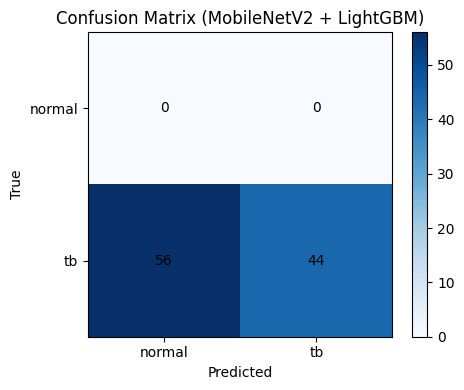

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


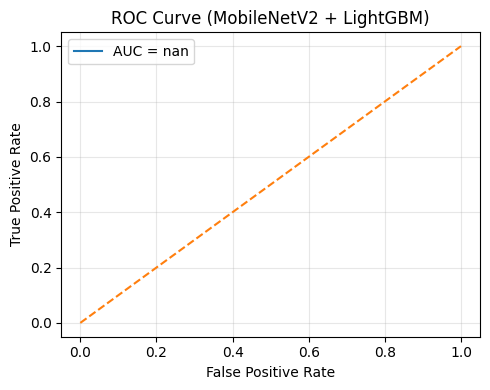


Computational Complexity (Empirical):
Train feature extraction time (s): 38.69
Val feature extraction time (s):   10.27
LightGBM training time (s):        14.21
Inference time (s):                0.0187
Feature dimension:                 1280

NOTE: MobileNetV2 is used strictly as a fixed feature extractor.


In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) LOAD DATA (SAME 80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

# =========================
# 3) MOBILENETV2 FEATURE EXTRACTOR (NO AUGMENTATION)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

feature_extractor = tf.keras.Model(inputs, x)
feature_extractor.summary()

# =========================
# 4) FEATURE EXTRACTION (TIME MEASURED)
# =========================
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
train_feat_time = time.time() - start

start = time.time()
X_val_feat = feature_extractor.predict(val_ds, verbose=1)
val_feat_time = time.time() - start

y_train = np.concatenate([y.numpy() for _, y in train_ds]).astype(int)
y_val   = np.concatenate([y.numpy() for _, y in val_ds]).astype(int)

print("Feature shape:", X_train_feat.shape)

# =========================
# 5) LIGHTGBM TRAINING
# =========================
start = time.time()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(X_train_feat, y_train)

lgb_train_time = time.time() - start

# =========================
# 6) INFERENCE & METRICS
# =========================
start = time.time()
y_prob = lgbm.predict_proba(X_val_feat)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
inference_time = time.time() - start

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("\nClassification Report (MobileNetV2 + LightGBM):")
print(classification_report(y_val, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}")

# =========================
# 7) CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (MobileNetV2 + LightGBM)")
plt.colorbar()
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# =========================
# 8) ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MobileNetV2 + LightGBM)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# 9) COMPUTATIONAL COMPLEXITY
# =========================
print("\nComputational Complexity (Empirical):")
print(f"Train feature extraction time (s): {train_feat_time:.2f}")
print(f"Val feature extraction time (s):   {val_feat_time:.2f}")
print(f"LightGBM training time (s):        {lgb_train_time:.2f}")
print(f"Inference time (s):                {inference_time:.4f}")
print(f"Feature dimension:                 {X_train_feat.shape[1]}")

print("\nNOTE: MobileNetV2 is used strictly as a fixed feature extractor.")


using resnet50 for feature extraction


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ add[0][0]         │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c

 Total params: 23,595,904 (90.01 MB)

 Trainable params: 4,096 (16.00 KB)

 Non-trainable params: 23,591,808 (90.00 MB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 86s 6s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step
Feature shape: (400, 2048)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report (ResNet50 + RF):
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00         0
          tb       1.00      0.48      0.65       100

    accuracy                           0.48       100
   macro avg       0.50      0.24      0.32       100
weighted avg       1.00      0.48      0.65       100

Accuracy: 0.4800
ROC-AUC:  nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zer

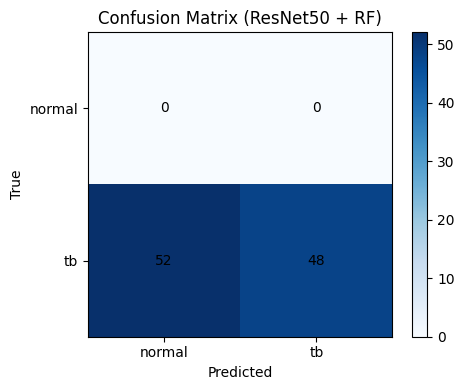

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


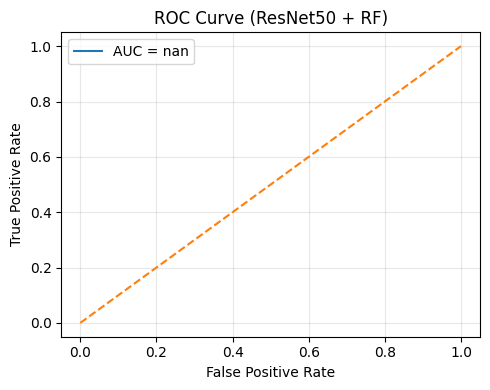


Computational Complexity (Empirical):
Train feature extraction time (s): 86.29
Val feature extraction time (s):   19.55
RF training time (s):              3.23
Inference time (s):                0.2186
Feature dimension:                 2048


In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"  # change if needed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

# =========================
# 3) RESNET50 FEATURE EXTRACTOR (NO AUGMENTATION)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)

base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

feature_extractor = tf.keras.Model(inputs, x)
feature_extractor.summary()

# =========================
# 4) FEATURE EXTRACTION (TIME MEASURED)
# =========================
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
train_feat_time = time.time() - start

start = time.time()
X_val_feat = feature_extractor.predict(val_ds, verbose=1)
val_feat_time = time.time() - start

y_train = np.concatenate([y.numpy() for _, y in train_ds]).astype(int)
y_val   = np.concatenate([y.numpy() for _, y in val_ds]).astype(int)

print("Feature shape:", X_train_feat.shape)

# =========================
# 5) RANDOM FOREST TRAINING
# =========================
start = time.time()
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=SEED,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train_feat, y_train)
rf_train_time = time.time() - start

# =========================
# 6) INFERENCE & METRICS
# =========================
start = time.time()
y_pred = rf.predict(X_val_feat)
y_prob = rf.predict_proba(X_val_feat)[:, 1]
inference_time = time.time() - start

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("\nClassification Report (ResNet50 + RF):")
print(classification_report(y_val, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}")

# =========================
# 7) CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (ResNet50 + RF)")
plt.colorbar()
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# =========================
# 8) ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (ResNet50 + RF)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# 9) COMPUTATIONAL COMPLEXITY
# =========================
print("\nComputational Complexity (Empirical):")
print(f"Train feature extraction time (s): {train_feat_time:.2f}")
print(f"Val feature extraction time (s):   {val_feat_time:.2f}")
print(f"RF training time (s):              {rf_train_time:.2f}")
print(f"Inference time (s):                {inference_time:.4f}")
print(f"Feature dimension:                 {X_train_feat.shape[1]}")


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


/tmp/ipython-input-1064652107.py:72: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ true_divide_1       │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (TrueDivide)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_1          │ (None, 224, 224,  │          0 │ true_divide_1[0]… │
│ (Subtract)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ subtract_1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis

 Total params: 2,263,104 (8.63 MB)

 Trainable params: 2,560 (10.00 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 862ms/step
Feature shape: (400, 1280)
[LightGBM] [Info] Number of positive: 195, number of negative: 205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128298
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 1278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

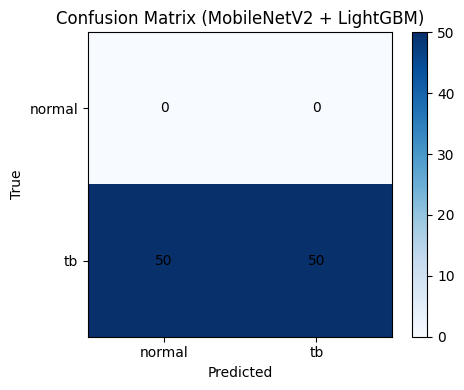

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


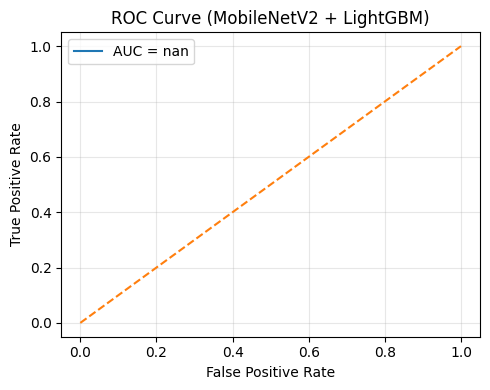


Computational Complexity (Empirical):
Train feature extraction time (s): 26.82
Val feature extraction time (s):   4.67
LightGBM training time (s):        13.91
Inference time (s):                0.0120
Feature dimension:                 1280

NOTE: MobileNetV2 is used strictly as a fixed feature extractor.


In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

tf.random.set_seed(SEED)
np.random.seed(SEED)

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

# =========================
# 3) MOBILENETV2 FEATURE EXTRACTOR (NO AUGMENTATION)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

feature_extractor = tf.keras.Model(inputs, x)
feature_extractor.summary()

# =========================
# 4) FEATURE EXTRACTION (TIME MEASURED)
# =========================
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
train_feat_time = time.time() - start

start = time.time()
X_val_feat = feature_extractor.predict(val_ds, verbose=1)
val_feat_time = time.time() - start

y_train = np.concatenate([y.numpy() for _, y in train_ds]).astype(int)
y_val   = np.concatenate([y.numpy() for _, y in val_ds]).astype(int)

print("Feature shape:", X_train_feat.shape)

# =========================
# 5) LIGHTGBM TRAINING
# =========================
start = time.time()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(X_train_feat, y_train)
lgb_train_time = time.time() - start

# =========================
# 6) INFERENCE & METRICS
# =========================
start = time.time()
y_prob = lgbm.predict_proba(X_val_feat)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
inference_time = time.time() - start

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("\nClassification Report (MobileNetV2 + LightGBM):")
print(classification_report(y_val, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}")

# =========================
# 7) CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (MobileNetV2 + LightGBM)")
plt.colorbar()
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# =========================
# 8) ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MobileNetV2 + LightGBM)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# 9) COMPUTATIONAL COMPLEXITY
# =========================
print("\nComputational Complexity (Empirical):")
print(f"Train feature extraction time (s): {train_feat_time:.2f}")
print(f"Val feature extraction time (s):   {val_feat_time:.2f}")
print(f"LightGBM training time (s):        {lgb_train_time:.2f}")
print(f"Inference time (s):                {inference_time:.4f}")
print(f"Feature dimension:                 {X_train_feat.shape[1]}")

print("\nNOTE: MobileNetV2 is used strictly as a fixed feature extractor.")


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ add_1[0][0]       │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step
Feature shape: (400, 2048)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report (ResNet50 + SVM):
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00         0
          tb       1.00      0.39      0.56       100

    accuracy                           0.39       100
   macro avg       0.50      0.20      0.28       100
weighted avg       1.00      0.39      0.56       100

Accuracy: 0.3900
ROC-AUC:  nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zer

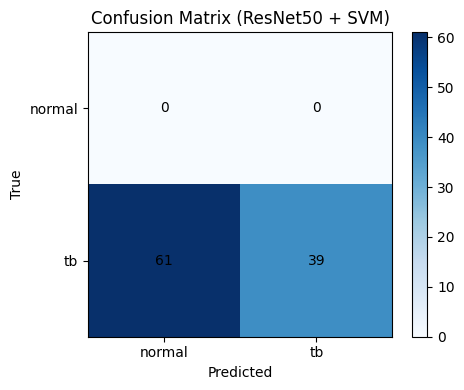

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


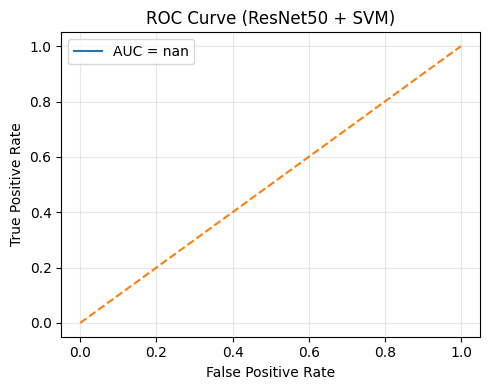


Computational Complexity (Empirical):
Train feature extraction time (s): 142.06
Val feature extraction time (s):   20.90
SVM training time (s):             1.14
Inference time (s):                0.1716
Feature dimension:                 2048

NOTE: ResNet50 is used strictly as a fixed feature extractor.


In [ ]:
# =========================
# 0) SETUP
# =========================
!pip -q install tensorflow matplotlib scikit-learn

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# =========================
# 1) PATHS & PARAMETERS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

tf.random.set_seed(SEED)
np.random.seed(SEED)

# =========================
# 2) LOAD DATA (80–20 SPLIT)
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

# =========================
# 3) RESNET50 FEATURE EXTRACTOR (NO AUGMENTATION)
# =========================
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs)

base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)
base_model.trainable = False  # FIXED FEATURE EXTRACTOR

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

feature_extractor = tf.keras.Model(inputs, x)
feature_extractor.summary()

# =========================
# 4) FEATURE EXTRACTION (TIME MEASURED)
# =========================
start = time.time()
X_train_feat = feature_extractor.predict(train_ds, verbose=1)
train_feat_time = time.time() - start

start = time.time()
X_val_feat = feature_extractor.predict(val_ds, verbose=1)
val_feat_time = time.time() - start

y_train = np.concatenate([y.numpy() for _, y in train_ds]).astype(int)
y_val   = np.concatenate([y.numpy() for _, y in val_ds]).astype(int)

print("Feature shape:", X_train_feat.shape)  # (N, 2048)

# =========================
# 5) SVM PIPELINE (SCALING + CLASSIFIER)
# =========================
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),   # REQUIRED FOR SVM
    ("svm", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        probability=True,
        class_weight="balanced",
        random_state=SEED
    ))
])

# =========================
# 6) SVM TRAINING
# =========================
start = time.time()
svm_pipeline.fit(X_train_feat, y_train)
svm_train_time = time.time() - start

# =========================
# 7) INFERENCE & METRICS
# =========================
start = time.time()
y_prob = svm_pipeline.predict_proba(X_val_feat)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
inference_time = time.time() - start

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print("\nClassification Report (ResNet50 + SVM):")
print(classification_report(y_val, y_pred, target_names=class_names))

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}")

# =========================
# 8) CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (ResNet50 + SVM)")
plt.colorbar()
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# =========================
# 9) ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (ResNet50 + SVM)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# 10) COMPUTATIONAL COMPLEXITY
# =========================
print("\nComputational Complexity (Empirical):")
print(f"Train feature extraction time (s): {train_feat_time:.2f}")
print(f"Val feature extraction time (s):   {val_feat_time:.2f}")
print(f"SVM training time (s):             {svm_train_time:.2f}")
print(f"Inference time (s):                {inference_time:.4f}")
print(f"Feature dimension:                 {X_train_feat.shape[1]}")

print("\nNOTE: ResNet50 is used strictly as a fixed feature extractor.")


In [ ]:
## end of wrong result  , reason image_dataset_from_directory expect
DATA_ROOT/
├── class1/
├── class2/

but we have nested folder


# **start of ml classifier and cnn feature**

# **MobileNetv2 for feature extraction and RandomForest for classification **

Normal images found: 250
TB images found: 250
Total images: 500
Class counts [normal, tb]: [250 250]
Train: 350 Val: 75 Test: 75
Feature extractor output: (None, 1280)
MobileNetV2 params: total=2,257,984 | trainable=0.0 (frozen feature extractor)
Train features: (350, 1280) Val: (75, 1280) Test: (75, 1280)

Avg feature-extraction time per image:
  Train: 29.272 ms/image
  Val  : 24.238 ms/image
  Test : 34.467 ms/image

VAL Accuracy: 0.9733333333333334
VAL AUC: 0.9985775248933144
VAL Confusion Matrix:
 [[37  0]
 [ 2 36]]

VAL Report:
               precision    recall  f1-score   support

      normal       0.95      1.00      0.97        37
          tb       1.00      0.95      0.97        38

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75


TEST Accuracy: 0.9733333333333334
TEST AUC: 0.9978662873399715
TEST Confusion Matrix:
 [[38  0]
 [ 2 35]]

TEST Report:
           

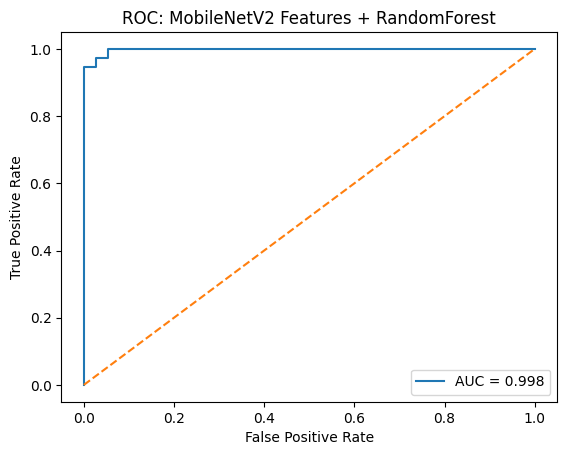


EXECUTION TIME SUMMARY
scan_images         : 0.039 s
split_data          : 0.004 s
build_mobilenetv2   : 1.873 s
feat_extract_train  : 10.245 s
feat_extract_val    : 1.818 s
feat_extract_test   : 2.585 s
rf_train            : 3.580 s
rf_infer_val        : 0.098 s
rf_infer_test       : 0.095 s
TOTAL               : 20.795 s

COMPUTATIONAL COMPLEXITY (HIGH-LEVEL)
Images (N): train=350, val=75, test=75
Feature dim (d): 1280
Trees (T): 500

Approx complexity notes:
- Feature extraction: O(N * MobileNetV2_inference_cost)
- RF training (typical): ~ O(T * N * d * log N)
- RF inference per image: ~ O(T * depth)

MobileNetV2 param-based proxy (frozen):
- Total params: 2,257,984 | Trainable params: 0.0


In [ ]:
# =========================
# MobileNetV2 (Feature Extractor) + RandomForest (Classifier)
# Recursively reads images from normal/ and tb/ (including subfolders)
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# =========================
# 1) PATHS (EDIT THIS)
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"   # change if needed
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

if not os.path.isdir(NORMAL_DIR) or not os.path.isdir(TB_DIR):
    raise FileNotFoundError(
        f"Folder not found.\nExpected:\n  {NORMAL_DIR}\n  {TB_DIR}\n"
        f"Current DATA_ROOT contents: {os.listdir(DATA_ROOT) if os.path.isdir(DATA_ROOT) else 'DATA_ROOT not found'}"
    )

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

print("Normal images found:", len(normal_paths))
print("TB images found:", len(tb_paths))

if len(normal_paths) == 0 or len(tb_paths) == 0:
    print("\nDEBUG: Example folder listing:")
    print("NORMAL_DIR sample:", os.listdir(NORMAL_DIR)[:10])
    print("TB_DIR sample:", os.listdir(TB_DIR)[:10])
    raise ValueError("No images found in one of the classes. Check folder structure and file extensions.")

# Labels: 0=normal, 1=tb
X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN/VAL/TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_paths, y, test_size=0.30, random_state=SEED, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

timings["split_data"] = now() - t0

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =========================
# 5) TF DATA PIPELINE (NO AUGMENTATION)
# =========================
def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # MobileNetV2 preprocessing
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) MOBILENETV2 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # outputs 1280-d vector per image
)
feature_extractor.trainable = False

timings["build_mobilenetv2"] = now() - t0

print("Feature extractor output:", feature_extractor.output_shape)

# Optional: model "complexity" proxy = number of parameters
params_total = feature_extractor.count_params()
params_train = np.sum([np.prod(v.shape) for v in feature_extractor.trainable_variables])
print(f"MobileNetV2 params: total={params_total:,} | trainable={params_train:,} (frozen feature extractor)")

def extract_features(ds, model):
    feats_all, labels_all = [], []
    for imgs, labels in ds:
        feats = model(imgs, training=False).numpy()
        feats_all.append(feats)
        labels_all.append(labels.numpy())
    Xf = np.concatenate(feats_all, axis=0)
    yf = np.concatenate(labels_all, axis=0).astype(int)
    return Xf, yf

# =========================
# 7) FEATURE EXTRACTION TIMING
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_extract_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_extract_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_extract_test"] = now() - t0

print("Train features:", Xf_train.shape, "Val:", Xf_val.shape, "Test:", Xf_test.shape)

# Average inference time per image (feature extraction)
n_train = len(X_train)
n_val   = len(X_val)
n_test  = len(X_test)

avg_train = timings["feat_extract_train"] / max(n_train, 1)
avg_val   = timings["feat_extract_val"] / max(n_val, 1)
avg_test  = timings["feat_extract_test"] / max(n_test, 1)

print("\nAvg feature-extraction time per image:")
print(f"  Train: {avg_train*1000:.3f} ms/image")
print(f"  Val  : {avg_val*1000:.3f} ms/image")
print(f"  Test : {avg_test*1000:.3f} ms/image")

# =========================
# 8) RANDOM FOREST TRAINING (WITH TIMING)
# =========================
t0 = now()

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf.fit(Xf_train, yf_train)

timings["rf_train"] = now() - t0

# =========================
# 9) VALIDATION METRICS (WITH TIMING)
# =========================
t0 = now()
val_prob = rf.predict_proba(Xf_val)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["rf_infer_val"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print("VAL Confusion Matrix:\n", confusion_matrix(yf_val, val_pred))
print("\nVAL Report:\n", classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 10) TEST METRICS + ROC (WITH TIMING)
# =========================
t0 = now()
test_prob = rf.predict_proba(Xf_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["rf_infer_test"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print("TEST Confusion Matrix:\n", confusion_matrix(yf_test, test_pred))
print("\nTEST Report:\n", classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: MobileNetV2 Features + RandomForest")
plt.legend()
plt.show()

# =========================
# 11) SUMMARY: EXECUTION TIME + COMPLEXITY NOTES
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:20s}: {fmt_sec(v)}")

print(f"{'TOTAL':20s}: {fmt_sec(TOTAL_T)}")

print("\n" + "="*60)
print("COMPUTATIONAL COMPLEXITY (HIGH-LEVEL)")
print("="*60)

# High-level complexity statements (informative, not exact FLOPs):
# Feature extraction: O(N * C_mobilenet) where C_mobilenet depends on input size and model layers
# RandomForest training: ~ O(T * N * d * logN) (typical) where T=trees, d=feature dim (1280)
# Inference RF: ~ O(T * depth) per sample

d = Xf_train.shape[1]  # feature dimension (typically 1280)
T = rf.n_estimators

print(f"Images (N): train={n_train}, val={n_val}, test={n_test}")
print(f"Feature dim (d): {d}")
print(f"Trees (T): {T}")
print("\nApprox complexity notes:")
print("- Feature extraction: O(N * MobileNetV2_inference_cost)")
print("- RF training (typical): ~ O(T * N * d * log N)")
print("- RF inference per image: ~ O(T * depth)")
print("\nMobileNetV2 param-based proxy (frozen):")
print(f"- Total params: {params_total:,} | Trainable params: {params_train:,}")


# **EfficientNetB0 (Feature Extractor) + RandomForest (Classifier)**

Normal images found: 250
TB images found: 250
Total images: 500
Class counts [normal, tb]: [250 250]
Train: 350 Val: 75 Test: 75
Feature extractor output: (None, 1280)
EfficientNetB0 params: total=4,049,571 | trainable=0
Feature shapes: (350, 1280) (75, 1280) (75, 1280)

VAL Accuracy: 0.9733333333333334
VAL AUC: 0.9982219061166429
VAL Confusion Matrix:
 [[36  1]
 [ 1 37]]

VAL Report:
               precision    recall  f1-score   support

      normal       0.97      0.97      0.97        37
          tb       0.97      0.97      0.97        38

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75


TEST Accuracy: 0.96
TEST AUC: 0.992176386913229
TEST Confusion Matrix:
 [[37  1]
 [ 2 35]]

TEST Report:
               precision    recall  f1-score   support

      normal       0.95      0.97      0.96        38
          tb       0.97      0.95      0.96        37

    accuracy 

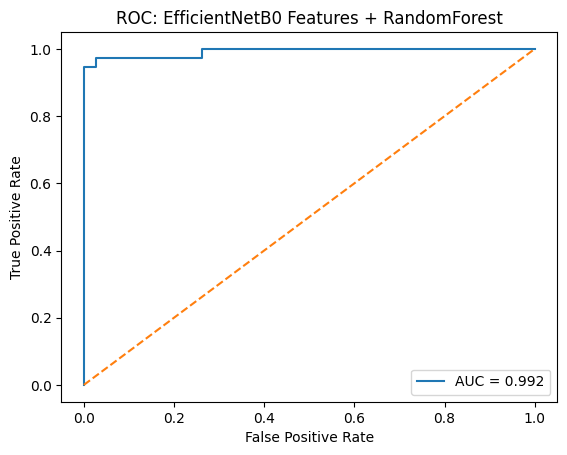


EXECUTION TIME SUMMARY
scan_images           : 0.026 s
split_data            : 0.008 s
build_efficientnetb0  : 3.451 s
feat_extract_train    : 1 min 7.2 s
feat_extract_val      : 14.709 s
feat_extract_test     : 13.808 s
rf_train              : 7.262 s
TOTAL                 : 1 min 47.3 s

Feature dimension (EfficientNetB0): 1280
Trees: 500


In [ ]:
# =========================
# EfficientNetB0 (Feature Extractor) + RandomForest (Classifier)
# Recursively reads images from normal/ and tb/ (including subfolders)
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)     # ✅ EfficientNetB0 standard
BATCH_SIZE = 32           # B0 is lightweight
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

print("Normal images found:", len(normal_paths))
print("TB images found:", len(tb_paths))

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_paths, y, test_size=0.30, random_state=SEED, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

timings["split_data"] = now() - t0

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) EFFICIENTNETB0 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # ➜ 1280-D features
)
feature_extractor.trainable = False

timings["build_efficientnetb0"] = now() - t0

params_total = feature_extractor.count_params()
params_train = 0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"EfficientNetB0 params: total={params_total:,} | trainable={params_train:,}")

def extract_features(ds, model):
    feats_all, labels_all = [], []
    for imgs, labels in ds:
        feats_all.append(model(imgs, training=False).numpy())
        labels_all.append(labels.numpy())
    return np.concatenate(feats_all), np.concatenate(labels_all).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_extract_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_extract_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_extract_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) RANDOM FOREST TRAINING
# =========================
t0 = now()

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf.fit(Xf_train, yf_train)

timings["rf_train"] = now() - t0

# =========================
# 9) VALIDATION METRICS
# =========================
val_prob = rf.predict_proba(Xf_val)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print("VAL Confusion Matrix:\n", confusion_matrix(yf_val, val_pred))
print("\nVAL Report:\n", classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 10) TEST METRICS + ROC
# =========================
test_prob = rf.predict_proba(Xf_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print("TEST Confusion Matrix:\n", confusion_matrix(yf_test, test_pred))
print("\nTEST Report:\n", classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: EfficientNetB0 Features + RandomForest")
plt.legend()
plt.show()

# =========================
# 11) SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\nFeature dimension (EfficientNetB0):", Xf_train.shape[1])
print("Trees:", rf.n_estimators)


# **resnet50 feature + randomForest**

Normal images found: 250
TB images found: 250
Total images: 500
Class counts [normal, tb]: [250 250]
Train: 350 Val: 75 Test: 75
Feature extractor output: (None, 2048)
 ResNet50 params: total=23,587,712 | trainable=0.0 (frozen feature extractor)
Train features: (350, 2048) Val: (75, 2048) Test: (75, 2048)

Avg feature-extraction time per image:
  Train: 306.777 ms/image
  Val  : 267.315 ms/image
  Test : 296.634 ms/image

VAL Accuracy: 0.9733333333333334
VAL AUC: 0.992176386913229
VAL Confusion Matrix:
 [[37  0]
 [ 2 36]]

VAL Report:
               precision    recall  f1-score   support

      normal       0.95      1.00      0.97        37
          tb       1.00      0.95      0.97        38

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75


TEST Accuracy: 0.9733333333333334
TEST AUC: 0.9935988620199147
TEST Confusion Matrix:
 [[38  0]
 [ 2 35]]

TEST Report:
          

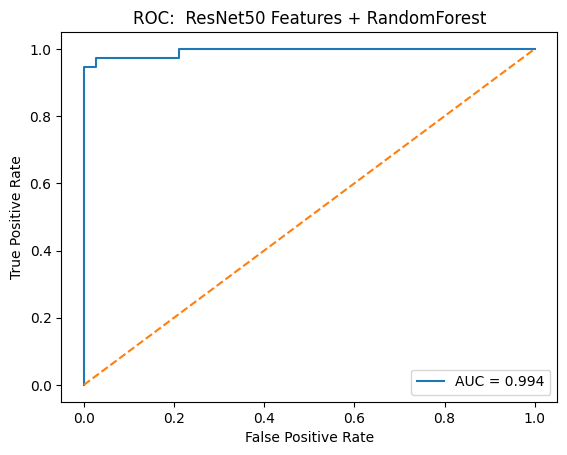


EXECUTION TIME SUMMARY
scan_images           : 0.029 s
split_data            : 0.007 s
build_ResNet50        : 2.463 s
feat_extract_train    : 1 min 47.4 s
feat_extract_val      : 20.049 s
feat_extract_test     : 22.248 s
rf_train              : 3.824 s
rf_infer_val          : 0.160 s
rf_infer_test         : 0.162 s
TOTAL                 : 2 min 36.8 s

COMPUTATIONAL COMPLEXITY (HIGH-LEVEL)
Images (N): train=350, val=75, test=75
Feature dim (d): 2048
Trees (T): 500

Approx complexity notes:
- Feature extraction: O(N *  ResNet50_inference_cost)
- RF training (typical): ~ O(T * N * d * log N)
- RF inference per image: ~ O(T * depth)
- ResNet50 param-based proxy (frozen):
- Total params: 23,587,712 | Trainable params: 0.0


In [ ]:
!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"   # change if needed
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

if not os.path.isdir(NORMAL_DIR) or not os.path.isdir(TB_DIR):
    raise FileNotFoundError(
        f"Folder not found.\nExpected:\n  {NORMAL_DIR}\n  {TB_DIR}\n"
        f"Current DATA_ROOT contents: {os.listdir(DATA_ROOT) if os.path.isdir(DATA_ROOT) else 'DATA_ROOT not found'}"
    )

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

print("Normal images found:", len(normal_paths))
print("TB images found:", len(tb_paths))

if len(normal_paths) == 0 or len(tb_paths) == 0:
    print("\nDEBUG: Example folder listing:")
    print("NORMAL_DIR sample:", os.listdir(NORMAL_DIR)[:10])
    print("TB_DIR sample:", os.listdir(TB_DIR)[:10])
    raise ValueError("No images found in one of the classes. Check folder structure and file extensions.")

# Labels: 0=normal, 1=tb
X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN/VAL/TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_paths, y, test_size=0.30, random_state=SEED, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

timings["split_data"] = now() - t0

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =========================
# 5) TF DATA PIPELINE (NO AUGMENTATION)
# =========================
def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # ResNet50 preprocessing
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) ResNet50 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"  # outputs a single feature vector per image
)
feature_extractor.trainable = False

timings["build_ResNet50"] = now() - t0

print("Feature extractor output:", feature_extractor.output_shape)

# Model "complexity" proxy = number of parameters
params_total = feature_extractor.count_params()
params_train = np.sum([np.prod(v.shape) for v in feature_extractor.trainable_variables])
print(f" ResNet50 params: total={params_total:,} | trainable={params_train:,} (frozen feature extractor)")

def extract_features(ds, model):
    feats_all, labels_all = [], []
    for imgs, labels in ds:
        feats = model(imgs, training=False).numpy()
        feats_all.append(feats)
        labels_all.append(labels.numpy())
    Xf = np.concatenate(feats_all, axis=0)
    yf = np.concatenate(labels_all, axis=0).astype(int)
    return Xf, yf

# =========================
# 7) FEATURE EXTRACTION TIMING
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_extract_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_extract_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_extract_test"] = now() - t0

print("Train features:", Xf_train.shape, "Val:", Xf_val.shape, "Test:", Xf_test.shape)

# Average inference time per image (feature extraction)
n_train = len(X_train)
n_val   = len(X_val)
n_test  = len(X_test)

avg_train = timings["feat_extract_train"] / max(n_train, 1)
avg_val   = timings["feat_extract_val"] / max(n_val, 1)
avg_test  = timings["feat_extract_test"] / max(n_test, 1)

print("\nAvg feature-extraction time per image:")
print(f"  Train: {avg_train*1000:.3f} ms/image")
print(f"  Val  : {avg_val*1000:.3f} ms/image")
print(f"  Test : {avg_test*1000:.3f} ms/image")


# =========================
# 8) RANDOM FOREST TRAINING (WITH TIMING)
# =========================
t0 = now()

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf.fit(Xf_train, yf_train)

timings["rf_train"] = now() - t0

# =========================
# 9) VALIDATION METRICS (WITH TIMING)
# =========================
t0 = now()
val_prob = rf.predict_proba(Xf_val)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["rf_infer_val"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print("VAL Confusion Matrix:\n", confusion_matrix(yf_val, val_pred))
print("\nVAL Report:\n", classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 10) TEST METRICS + ROC (WITH TIMING)
# =========================
t0 = now()
test_prob = rf.predict_proba(Xf_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["rf_infer_test"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print("TEST Confusion Matrix:\n", confusion_matrix(yf_test, test_pred))
print("\nTEST Report:\n", classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC:  ResNet50 Features + RandomForest")
plt.legend()
plt.show()

# =========================
# 11) SUMMARY: EXECUTION TIME + COMPLEXITY NOTES
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\n" + "="*60)
print("COMPUTATIONAL COMPLEXITY (HIGH-LEVEL)")
print("="*60)

d = Xf_train.shape[1]  # feature dimension (ResNet50 with pooling='avg' = 2048)
T = rf.n_estimators

print(f"Images (N): train={n_train}, val={n_val}, test={n_test}")
print(f"Feature dim (d): {d}")
print(f"Trees (T): {T}")
print("\nApprox complexity notes:")
print("- Feature extraction: O(N *  ResNet50_inference_cost)")
print("- RF training (typical): ~ O(T * N * d * log N)")
print("- RF inference per image: ~ O(T * depth)")
print("- ResNet50 param-based proxy (frozen):")
print(f"- Total params: {params_total:,} | Trainable params: {params_train:,}")









# **DenseNet121 feature + random forest **

Normal images: 250
TB images: 250
Total images: 500
Class distribution: [250 250]
Train: 350 Val: 75 Test: 75
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor output: (None, 1024)
DenseNet121 params: total=7,037,504 | trainable=0.0
Feature shapes: (350, 1024) (75, 1024) (75, 1024)

VAL Accuracy: 0.96
VAL AUC: 0.9879089615931721
VAL Confusion Matrix:
 [[37  0]
 [ 3 35]]

VAL Report:
               precision    recall  f1-score   support

      normal       0.93      1.00      0.96        37
          tb       1.00      0.92      0.96        38

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


TEST Accuracy: 0.96
TEST AUC: 0.9861308677098151
TEST Confusion Matrix:
 [[36  2]
 [ 1 36]]

TEST Report:
               precision    recall  f1-score   support

      normal       0.97      0.95      0.96        38
          tb       0.95      0.97      0.96       

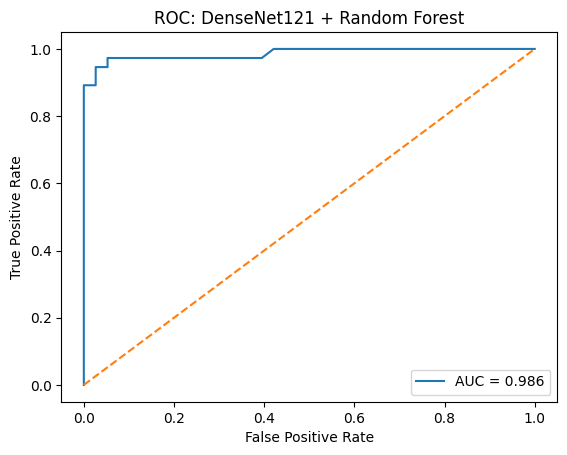


EXECUTION TIME SUMMARY
scan_images         : 0.036 s
split_data          : 0.008 s
build_densenet121   : 5.607 s
feat_train          : 2 min 1.2 s
feat_val            : 41.272 s
feat_test           : 41.019 s
rf_train            : 3.630 s
TOTAL               : 3 min 33.7 s

COMPLEXITY NOTES
Feature dimension (d): 1024
- Feature extraction: O(N * DenseNet121_inference_cost)
- RF training: ~ O(T * N * d * log N)
- RF inference: ~ O(T * depth)


In [ ]:
!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

if not os.path.isdir(NORMAL_DIR) or not os.path.isdir(TB_DIR):
    raise FileNotFoundError("Class folders not found")

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

print("Normal images:", len(normal_paths))
print("TB images:", len(tb_paths))

# Labels: 0=normal, 1=tb
X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class distribution:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_paths, y, test_size=0.30, random_state=SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

timings["split_data"] = now() - t0

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    img.set_shape([None, None, 3])
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # DenseNet preprocessing
    return img, label

def make_ds(paths, labels, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(len(paths), seed=SEED)
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_ds(X_train, y_train, shuffle=True)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) DenseNet121 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling="avg"
)
feature_extractor.trainable = False

timings["build_densenet121"] = now() - t0

print("Feature extractor output:", feature_extractor.output_shape)

params_total = feature_extractor.count_params()
params_train = np.sum([np.prod(v.shape) for v in feature_extractor.trainable_variables])

print(f"DenseNet121 params: total={params_total:,} | trainable={params_train:,}")

# =========================
# 7) FEATURE EXTRACTION
# =========================
def extract_features(ds, model):
    feats_all, labels_all = [], []
    for imgs, labels in ds:
        feats = model(imgs, training=False).numpy()
        feats_all.append(feats)
        labels_all.append(labels.numpy())
    return np.concatenate(feats_all), np.concatenate(labels_all).astype(int)

t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
tf.keras.backend.clear_session()
gc.collect()
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) RANDOM FOREST TRAINING
# =========================
t0 = now()

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf.fit(Xf_train, yf_train)

timings["rf_train"] = now() - t0

# =========================
# 9) VALIDATION METRICS
# =========================
val_prob = rf.predict_proba(Xf_val)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print("VAL Confusion Matrix:\n", confusion_matrix(yf_val, val_pred))
print("\nVAL Report:\n", classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 10) TEST METRICS + ROC
# =========================
test_prob = rf.predict_proba(Xf_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print("TEST Confusion Matrix:\n", confusion_matrix(yf_test, test_pred))
print("\nTEST Report:\n", classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: DenseNet121 + Random Forest")
plt.legend()
plt.show()

# =========================
# 11) SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\nEXECUTION TIME SUMMARY")
for k, v in timings.items():
    print(f"{k:20s}: {fmt_sec(v)}")

print(f"{'TOTAL':20s}: {fmt_sec(TOTAL_T)}")

print("\nCOMPLEXITY NOTES")
d = Xf_train.shape[1]  # DenseNet121 = 1024
print(f"Feature dimension (d): {d}")
print("- Feature extraction: O(N * DenseNet121_inference_cost)")
print("- RF training: ~ O(T * N * d * log N)")
print("- RF inference: ~ O(T * depth)")


# **Vgg19 feature and random forest**

Normal images: 250
TB images: 250
Total images: 500
Class distribution: [250 250]
Train: 350 Val: 75 Test: 75
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Feature extractor output: (None, 512)
VGG19 params: total=20,024,384 | trainable=0.0
Feature shapes: (350, 512) (75, 512) (75, 512)

VAL Accuracy: 0.9466666666666667
VAL AUC: 0.9857752489331436
VAL Confusion Matrix:
 [[35  2]
 [ 2 36]]

VAL Report:
               precision    recall  f1-score   support

      normal       0.95      0.95      0.95        37
          tb       0.95      0.95      0.95        38

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75


TEST Accuracy: 0.96
TEST AUC: 0.9893314366998578
TEST Confusion Matrix:
 [[37  1]
 [ 2 35]]

TEST Report:
               precision    recall  f1-score   support

      normal       0.95      0.97      0.96        38
          tb       0.97      0.95      0.96  

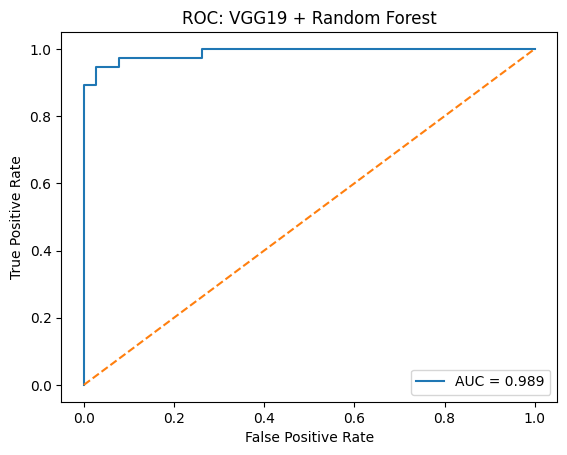


EXECUTION TIME SUMMARY
scan_images         : 0.080 s
split_data          : 0.007 s
build_vgg19         : 2.061 s
feat_train          : 6 min 22.0 s
feat_val            : 1 min 3.8 s
feat_test           : 1 min 21.9 s
rf_train            : 2.669 s
TOTAL               : 8 min 53.6 s

COMPLEXITY NOTES
Feature dimension (d): 512
- Feature extraction: O(N * VGG19_inference_cost)
- RF training: ~ O(T * N * d * log N)
- RF inference: ~ O(T * depth)


In [ ]:
!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

if not os.path.isdir(NORMAL_DIR) or not os.path.isdir(TB_DIR):
    raise FileNotFoundError("Class folders not found")

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

print("Normal images:", len(normal_paths))
print("TB images:", len(tb_paths))

# Labels: 0=normal, 1=tb
X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class distribution:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_paths, y, test_size=0.30, random_state=SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

timings["split_data"] = now() - t0

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    img.set_shape([None, None, 3])
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # VGG19 preprocessing
    return img, label

def make_ds(paths, labels, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(len(paths), seed=SEED)
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_ds(X_train, y_train, shuffle=True)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) VGG19 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling="avg"   # critical for RF
)
feature_extractor.trainable = False

timings["build_vgg19"] = now() - t0

print("Feature extractor output:", feature_extractor.output_shape)

params_total = feature_extractor.count_params()
params_train = np.sum([np.prod(v.shape) for v in feature_extractor.trainable_variables])

print(f"VGG19 params: total={params_total:,} | trainable={params_train:,}")

# =========================
# 7) FEATURE EXTRACTION
# =========================
def extract_features(ds, model):
    feats_all, labels_all = [], []
    for imgs, labels in ds:
        feats = model(imgs, training=False).numpy()
        feats_all.append(feats)
        labels_all.append(labels.numpy())
    return np.concatenate(feats_all), np.concatenate(labels_all).astype(int)

t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) RANDOM FOREST TRAINING
# =========================
t0 = now()

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf.fit(Xf_train, yf_train)

timings["rf_train"] = now() - t0

# =========================
# 9) VALIDATION METRICS
# =========================
val_prob = rf.predict_proba(Xf_val)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print("VAL Confusion Matrix:\n", confusion_matrix(yf_val, val_pred))
print("\nVAL Report:\n", classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 10) TEST METRICS + ROC
# =========================
test_prob = rf.predict_proba(Xf_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print("TEST Confusion Matrix:\n", confusion_matrix(yf_test, test_pred))
print("\nTEST Report:\n", classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: VGG19 + Random Forest")
plt.legend()
plt.show()

# =========================
# 11) SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\nEXECUTION TIME SUMMARY")
for k, v in timings.items():
    print(f"{k:20s}: {fmt_sec(v)}")

print(f"{'TOTAL':20s}: {fmt_sec(TOTAL_T)}")

print("\nCOMPLEXITY NOTES")
d = Xf_train.shape[1]  # VGG19 = 512
print(f"Feature dimension (d): {d}")
print("- Feature extraction: O(N * VGG19_inference_cost)")
print("- RF training: ~ O(T * N * d * log N)")
print("- RF inference: ~ O(T * depth)")


# **ResNet101 feature and random forest**

Normal images: 250
TB images: 250
Total images: 500
Class distribution: [250 250]
Train: 350 Val: 75 Test: 75
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Feature extractor output: (None, 2048)
ResNet101 params: total=42,658,176 | trainable=0.0
Feature shapes: (350, 2048) (75, 2048) (75, 2048)

VAL Accuracy: 0.96
VAL AUC: 0.9914651493598863
VAL Confusion Matrix:
 [[36  1]
 [ 2 36]]

VAL Report:
               precision    recall  f1-score   support

      normal       0.95      0.97      0.96        37
          tb       0.97      0.95      0.96        38

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


TEST Accuracy: 0.96
TEST AUC: 0.9850640113798009
TEST Confusion Matrix:
 [[37  1]
 [ 2 35]]

TEST Report:
               precision    recall  f1-score   support

      normal       0.95      0.97      0.96        38
          tb       0.97      0.95      0.96      

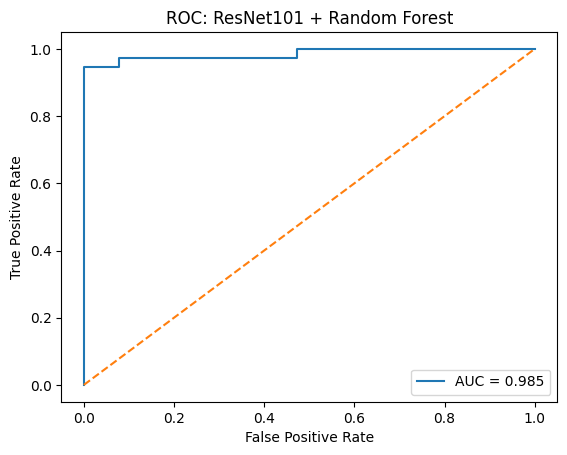


EXECUTION TIME SUMMARY
scan_images         : 0.017 s
split_data          : 0.003 s
build_resnet101     : 11.154 s
feat_train          : 4 min 22.0 s
feat_val            : 33.166 s
feat_test           : 34.634 s
rf_train            : 4.434 s
TOTAL               : 5 min 46.2 s

COMPLEXITY NOTES
Feature dimension (d): 2048
- Feature extraction: O(N * ResNet101_inference_cost)
- RF training: ~ O(T * N * d * log N)
- RF inference: ~ O(T * depth)


In [ ]:
!pip -q install tensorflow scikit-learn matplotlib

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

if not os.path.isdir(NORMAL_DIR) or not os.path.isdir(TB_DIR):
    raise FileNotFoundError("Class folders not found")

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

print("Normal images:", len(normal_paths))
print("TB images:", len(tb_paths))

# Labels: 0=normal, 1=tb
X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class distribution:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_temp, y_train, y_temp = train_test_split(
    X_paths, y, test_size=0.30, random_state=SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

timings["split_data"] = now() - t0

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_image(img_bytes, channels=3, expand_animations=False)
    img.set_shape([None, None, 3])
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # ResNet preprocessing
    return img, label

def make_ds(paths, labels, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(len(paths), seed=SEED)
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_ds(X_train, y_train, shuffle=True)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) ResNet101 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling="avg"
)
feature_extractor.trainable = False

timings["build_resnet101"] = now() - t0

print("Feature extractor output:", feature_extractor.output_shape)

params_total = feature_extractor.count_params()
params_train = np.sum([np.prod(v.shape) for v in feature_extractor.trainable_variables])

print(f"ResNet101 params: total={params_total:,} | trainable={params_train:,}")

# =========================
# 7) FEATURE EXTRACTION
# =========================
def extract_features(ds, model):
    feats_all, labels_all = [], []
    for imgs, labels in ds:
        feats = model(imgs, training=False).numpy()
        feats_all.append(feats)
        labels_all.append(labels.numpy())
    return np.concatenate(feats_all), np.concatenate(labels_all).astype(int)

t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) RANDOM FOREST TRAINING
# =========================
t0 = now()

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf.fit(Xf_train, yf_train)

timings["rf_train"] = now() - t0

# =========================
# 9) VALIDATION METRICS
# =========================
val_prob = rf.predict_proba(Xf_val)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print("VAL Confusion Matrix:\n", confusion_matrix(yf_val, val_pred))
print("\nVAL Report:\n", classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 10) TEST METRICS + ROC
# =========================
test_prob = rf.predict_proba(Xf_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print("TEST Confusion Matrix:\n", confusion_matrix(yf_test, test_pred))
print("\nTEST Report:\n", classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: ResNet101 + Random Forest")
plt.legend()
plt.show()

# =========================
# 11) SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\nEXECUTION TIME SUMMARY")
for k, v in timings.items():
    print(f"{k:20s}: {fmt_sec(v)}")

print(f"{'TOTAL':20s}: {fmt_sec(TOTAL_T)}")

print("\nCOMPLEXITY NOTES")
d = Xf_train.shape[1]  # ResNet101 = 2048
print(f"Feature dimension (d): {d}")
print("- Feature extraction: O(N * ResNet101_inference_cost)")
print("- RF training: ~ O(T * N * d * log N)")
print("- RF inference: ~ O(T * depth)")


# **ResNet50 feature + lightbgm**

Total images: 500
Class counts [normal, tb]: [250 250]
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor output: (None, 2048)
ResNet50 params: total=23,587,712 | trainable=0
Feature shapes: (350, 2048) (75, 2048) (75, 2048)
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 218259
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 2048
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


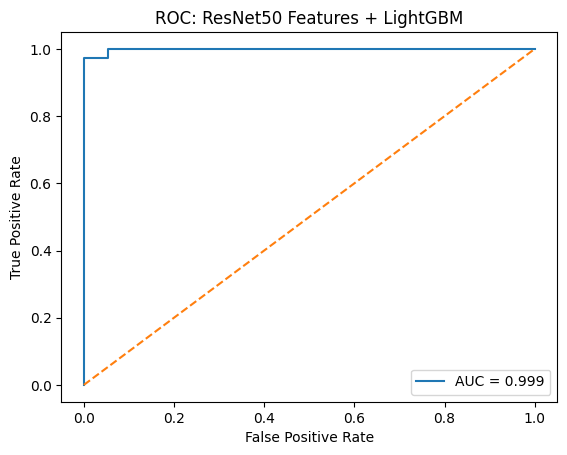


EXECUTION TIME SUMMARY
scan_images           : 2.436 s
split_data            : 0.012 s
build_resnet50        : 2.066 s
feat_train            : 2 min 22.0 s
feat_val              : 20.144 s
feat_test             : 21.055 s
scaling               : 0.011 s
lgbm_train            : 13.838 s
lgbm_val_infer        : 0.007 s
lgbm_test_infer       : 0.007 s
TOTAL                 : 3 min 21.9 s

Feature dimension (ResNet50): 2048
LightGBM trees: 500


In [ ]:

# =========================
# ResNet50 (Feature Extractor) + LightGBM (Classifier)
# Recursively reads images from normal/ and tb/
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)   # ResNet50 standard input
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_paths, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

timings["split_data"] = now() - t0

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)   # ResNet preprocessing
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) RESNET50 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # outputs 2048-D feature vector
)
feature_extractor.trainable = False

timings["build_resnet50"] = now() - t0

params_total = feature_extractor.count_params()
params_train = 0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"ResNet50 params: total={params_total:,} | trainable={params_train}")

def extract_features(ds, model):
    Xf, yf = [], []
    for imgs, labels in ds:
        Xf.append(model(imgs, training=False).numpy())
        yf.append(labels.numpy())
    return np.concatenate(Xf), np.concatenate(yf).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) STANDARD SCALING (NO DATA LEAKAGE)
# =========================
t0 = now()

scaler = StandardScaler()
Xf_train_s = scaler.fit_transform(Xf_train)
Xf_val_s   = scaler.transform(Xf_val)
Xf_test_s  = scaler.transform(Xf_test)

timings["scaling"] = now() - t0

# =========================
# 9) LIGHTGBM TRAINING
# =========================
t0 = now()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(Xf_train_s, yf_train)

timings["lgbm_train"] = now() - t0

# =========================
# 10) VALIDATION METRICS
# =========================
t0 = now()
val_prob = lgbm.predict_proba(Xf_val_s)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["lgbm_val_infer"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print(confusion_matrix(yf_val, val_pred))
print(classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 11) TEST METRICS + ROC
# =========================
t0 = now()
test_prob = lgbm.predict_proba(Xf_test_s)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["lgbm_test_infer"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print(confusion_matrix(yf_test, test_pred))
print(classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: ResNet50 Features + LightGBM")
plt.legend()
plt.show()

# =========================
# 12) EXECUTION SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\nFeature dimension (ResNet50):", Xf_train.shape[1])
print("LightGBM trees:", lgbm.n_estimators)


# **DenseNet121 feature + lightbgm classifier**

Total images: 500
Class counts [normal, tb]: [250 250]
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor output: (None, 1024)
DenseNet121 params: total=7,037,504 | trainable=0
Feature shapes: (350, 1024) (75, 1024) (75, 1024)
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120469
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 1024
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


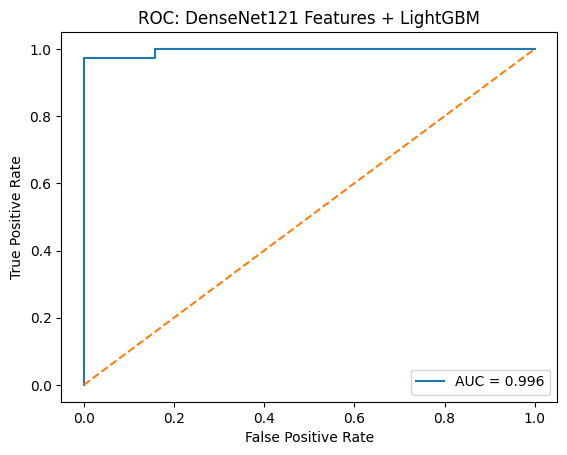


EXECUTION TIME SUMMARY
scan_images           : 0.020 s
split_data            : 0.005 s
build_densenet121     : 5.745 s
feat_train            : 1 min 53.7 s
feat_val              : 16.650 s
feat_test             : 17.271 s
scaling               : 0.007 s
lgbm_train            : 9.421 s
lgbm_val_infer        : 0.005 s
lgbm_test_infer       : 0.004 s
TOTAL                 : 2 min 43.1 s

Feature dimension (DenseNet121): 1024
LightGBM trees: 500


In [ ]:
# =========================
# DenseNet121 (Feature Extractor) + LightGBM (Classifier)
# Recursively reads images from normal/ and tb/
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)   # DenseNet standard input
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_paths, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

timings["split_data"] = now() - t0

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)   # DenseNet preprocessing
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) DENSENET121 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # outputs 1024-D feature vector
)
feature_extractor.trainable = False

timings["build_densenet121"] = now() - t0

params_total = feature_extractor.count_params()
params_train = 0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"DenseNet121 params: total={params_total:,} | trainable={params_train}")

def extract_features(ds, model):
    Xf, yf = [], []
    for imgs, labels in ds:
        Xf.append(model(imgs, training=False).numpy())
        yf.append(labels.numpy())
    return np.concatenate(Xf), np.concatenate(yf).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) STANDARD SCALING (NO DATA LEAKAGE)
# =========================
t0 = now()

scaler = StandardScaler()
Xf_train_s = scaler.fit_transform(Xf_train)
Xf_val_s   = scaler.transform(Xf_val)
Xf_test_s  = scaler.transform(Xf_test)

timings["scaling"] = now() - t0

# =========================
# 9) LIGHTGBM TRAINING
# =========================
t0 = now()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(Xf_train_s, yf_train)

timings["lgbm_train"] = now() - t0

# =========================
# 10) VALIDATION METRICS
# =========================
t0 = now()
val_prob = lgbm.predict_proba(Xf_val_s)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["lgbm_val_infer"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print(confusion_matrix(yf_val, val_pred))
print(classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 11) TEST METRICS + ROC
# =========================
t0 = now()
test_prob = lgbm.predict_proba(Xf_test_s)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["lgbm_test_infer"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print(confusion_matrix(yf_test, test_pred))
print(classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: DenseNet121 Features + LightGBM")
plt.legend()
plt.show()

# =========================
# 12) EXECUTION SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\nFeature dimension (DenseNet121):", Xf_train.shape[1])
print("LightGBM trees:", lgbm.n_estimators)


# **ResNet101 feature + LightBgm**

Total images: 500
Class counts [normal, tb]: [250 250]
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Feature extractor output: (None, 2048)
ResNet101 params: total=42,658,176 | trainable=0
Feature shapes: (350, 2048) (75, 2048) (75, 2048)
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214264
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 2048
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


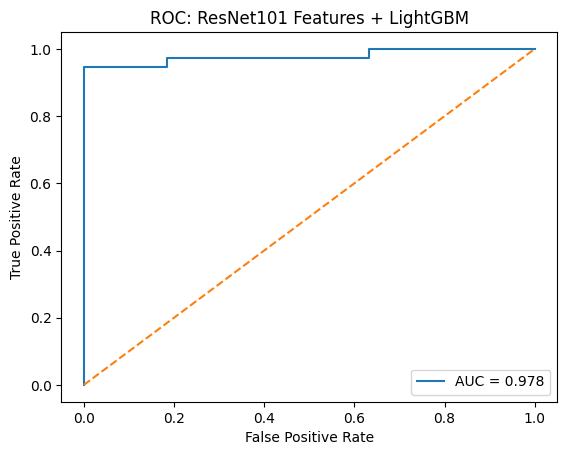


EXECUTION TIME SUMMARY
scan_images           : 0.020 s
split_data            : 0.004 s
build_resnet101       : 9.651 s
feat_train            : 3 min 22.0 s
feat_val              : 41.076 s
feat_test             : 40.975 s
scaling               : 0.019 s
lgbm_train            : 14.957 s
lgbm_val_infer        : 0.007 s
lgbm_test_infer       : 0.006 s
TOTAL                 : 5 min 9.1 s

Feature dimension (ResNet101): 2048
LightGBM trees: 500


In [ ]:
# =========================
# ResNet101 (Feature Extractor) + LightGBM (Classifier)
# Recursively reads images from normal/ and tb/
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)   # ResNet101 standard input
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_paths, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

timings["split_data"] = now() - t0

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) RESNET101 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # outputs 2048-D feature vector
)
feature_extractor.trainable = False

timings["build_resnet101"] = now() - t0

params_total = feature_extractor.count_params()
params_train = 0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"ResNet101 params: total={params_total:,} | trainable={params_train}")

def extract_features(ds, model):
    Xf, yf = [], []
    for imgs, labels in ds:
        Xf.append(model(imgs, training=False).numpy())
        yf.append(labels.numpy())
    return np.concatenate(Xf), np.concatenate(yf).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) STANDARD SCALING (NO DATA LEAKAGE)
# =========================
t0 = now()

scaler = StandardScaler()
Xf_train_s = scaler.fit_transform(Xf_train)
Xf_val_s   = scaler.transform(Xf_val)
Xf_test_s  = scaler.transform(Xf_test)

timings["scaling"] = now() - t0

# =========================
# 9) LIGHTGBM TRAINING
# =========================
t0 = now()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(Xf_train_s, yf_train)

timings["lgbm_train"] = now() - t0

# =========================
# 10) VALIDATION METRICS
# =========================
t0 = now()
val_prob = lgbm.predict_proba(Xf_val_s)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["lgbm_val_infer"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print(confusion_matrix(yf_val, val_pred))
print(classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 11) TEST METRICS + ROC
# =========================
t0 = now()
test_prob = lgbm.predict_proba(Xf_test_s)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["lgbm_test_infer"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print(confusion_matrix(yf_test, test_pred))
print(classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: ResNet101 Features + LightGBM")
plt.legend()
plt.show()

# =========================
# 12) EXECUTION SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\nFeature dimension (ResNet101):", Xf_train.shape[1])
print("LightGBM trees:", lgbm.n_estimators)


# **EfficientNetB0 feature + ligthBgm**

Total images: 500
Class counts [normal, tb]: [250 250]
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor output: (None, 1280)
EfficientNetB0 params: 4,049,571
Feature shapes: (350, 1280) (75, 1280) (75, 1280)
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150619
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 1280
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


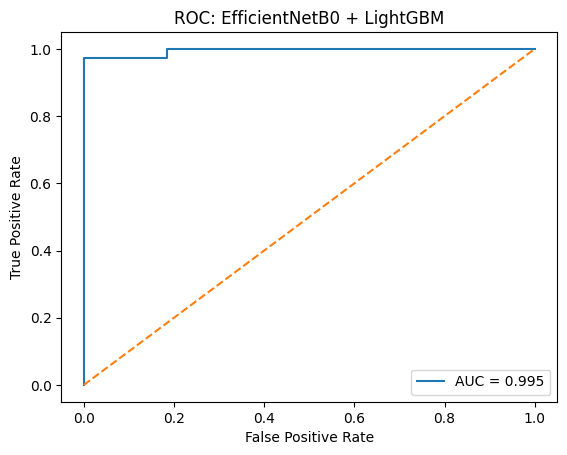


EXECUTION TIME SUMMARY
scan_images           : 0.083 s
split_data            : 0.015 s
build_efficientnetb0  : 4.656 s
feat_train            : 53.626 s
feat_val              : 10.239 s
feat_test             : 9.149 s
scaling               : 0.011 s
lgbm_train            : 7.670 s
TOTAL                 : 1 min 26.7 s

Feature dimension (EfficientNetB0): 1280
LightGBM trees: 300


In [ ]:
# =========================
# EfficientNetB0 (Feature Extractor) + LightGBM (Classifier)
# Recursively reads images from normal/ and tb/
# NO augmentation
# Execution time + compute reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib lightgbm

import os
import time
import gc
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)     # EfficientNetB0 standard
BATCH_SIZE = 16           # safe for B0
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_paths, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

timings["split_data"] = now() - t0

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) EFFICIENTNETB0 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"     # outputs 1280-D features
)
feature_extractor.trainable = False

timings["build_efficientnetb0"] = now() - t0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"EfficientNetB0 params: {feature_extractor.count_params():,}")

def extract_features(ds, model):
    Xf, yf = [], []
    for imgs, labels in ds:
        Xf.append(model(imgs, training=False).numpy())
        yf.append(labels.numpy())
    return np.concatenate(Xf), np.concatenate(yf).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# 🔥 Clear TF graph (SAFE NOW)
tf.keras.backend.clear_session()
gc.collect()

# =========================
# 8) STANDARD SCALING
# =========================
t0 = now()

scaler = StandardScaler()
Xf_train_s = scaler.fit_transform(Xf_train)
Xf_val_s   = scaler.transform(Xf_val)
Xf_test_s  = scaler.transform(Xf_test)

timings["scaling"] = now() - t0

# 🔥 Free raw features
del Xf_train, Xf_val, Xf_test
gc.collect()

# =========================
# 9) LIGHTGBM TRAINING
# =========================
t0 = now()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(Xf_train_s, yf_train)
timings["lgbm_train"] = now() - t0

# =========================
# 10) VALIDATION METRICS
# =========================
val_prob = lgbm.predict_proba(Xf_val_s)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print(confusion_matrix(yf_val, val_pred))
print(classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 11) TEST METRICS + ROC
# =========================
test_prob = lgbm.predict_proba(Xf_test_s)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print(confusion_matrix(yf_test, test_pred))
print(classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: EfficientNetB0 + LightGBM")
plt.legend()
plt.show()

# =========================
# 12) EXECUTION SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")
print("\nFeature dimension (EfficientNetB0):", Xf_train_s.shape[1])
print("LightGBM trees:", lgbm.n_estimators)


# **vgg19 feature + ligthbgm**

Total images: 500
Class counts [normal, tb]: [250 250]
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor output: (None, 512)
VGG19 params: total=20,024,384 | trainable=0
Feature shapes: (350, 512) (75, 512) (75, 512)
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51705
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 512
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


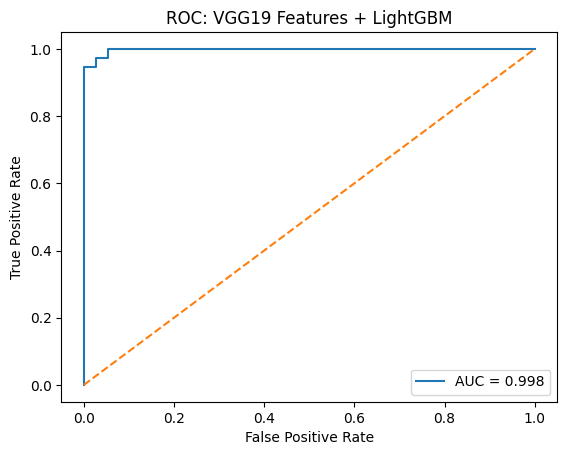


EXECUTION TIME SUMMARY
scan_images           : 0.014 s
split_data            : 0.004 s
build_vgg19           : 1.179 s
feat_train            : 4 min 16.4 s
feat_val              : 1 min 21.9 s
feat_test             : 54.193 s
scaling               : 0.006 s
lgbm_train            : 3.519 s
lgbm_val_infer        : 0.005 s
lgbm_test_infer       : 0.003 s
TOTAL                 : 6 min 37.5 s

Feature dimension (VGG19): 512
LightGBM trees: 500


In [ ]:
# =========================
# VGG19 (Feature Extractor) + LightGBM (Classifier)
# Recursively reads images from normal/ and tb/
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)   # VGG19 standard input
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_paths, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

timings["split_data"] = now() - t0

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)   # VGG preprocessing
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) VGG19 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # outputs 512-D feature vector
)
feature_extractor.trainable = False

timings["build_vgg19"] = now() - t0

params_total = feature_extractor.count_params()
params_train = 0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"VGG19 params: total={params_total:,} | trainable={params_train}")

def extract_features(ds, model):
    Xf, yf = [], []
    for imgs, labels in ds:
        Xf.append(model(imgs, training=False).numpy())
        yf.append(labels.numpy())
    return np.concatenate(Xf), np.concatenate(yf).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) STANDARD SCALING (NO DATA LEAKAGE)
# =========================
t0 = now()

scaler = StandardScaler()
Xf_train_s = scaler.fit_transform(Xf_train)
Xf_val_s   = scaler.transform(Xf_val)
Xf_test_s  = scaler.transform(Xf_test)

timings["scaling"] = now() - t0

# =========================
# 9) LIGHTGBM TRAINING
# =========================
t0 = now()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(Xf_train_s, yf_train)

timings["lgbm_train"] = now() - t0

# =========================
# 10) VALIDATION METRICS
# =========================
t0 = now()
val_prob = lgbm.predict_proba(Xf_val_s)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["lgbm_val_infer"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print(confusion_matrix(yf_val, val_pred))
print(classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 11) TEST METRICS + ROC
# =========================
t0 = now()
test_prob = lgbm.predict_proba(Xf_test_s)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["lgbm_test_infer"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print(confusion_matrix(yf_test, test_pred))
print(classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: VGG19 Features + LightGBM")
plt.legend()
plt.show()

# =========================
# 12) EXECUTION SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\nFeature dimension (VGG19):", Xf_train.shape[1])
print("LightGBM trees:", lgbm.n_estimators)


# **MobileNet + lightBgm**

Total images: 500
Class counts [normal, tb]: [250 250]
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor output: (None, 1280)
MobileNetV2 params: total=2,257,984 | trainable=0
Feature shapes: (350, 1280) (75, 1280) (75, 1280)
[LightGBM] [Info] Number of positive: 175, number of negative: 175
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118728
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 1277
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



VAL Accuracy: 1.0
VAL AUC: 1.0
[[37  0]
 [ 0 38]]
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        37
          tb       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


TEST Accuracy: 0.9733333333333334
TEST AUC: 0.992176386913229
[[38  0]
 [ 2 35]]
              precision    recall  f1-score   support

      normal       0.95      1.00      0.97        38
          tb       1.00      0.95      0.97        37

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



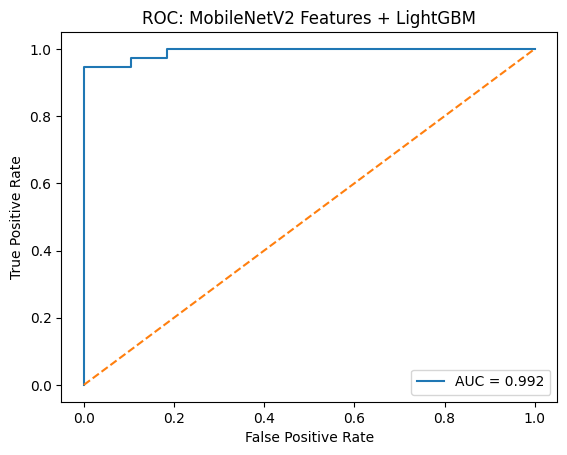


EXECUTION TIME SUMMARY
scan_images           : 0.125 s
split_data            : 0.019 s
build_mobilenetv2     : 2.613 s
feat_train            : 41.008 s
feat_val              : 5.081 s
feat_test             : 5.449 s
scaling               : 0.011 s
lgbm_train            : 10.364 s
lgbm_val_infer        : 0.007 s
lgbm_test_infer       : 0.005 s
TOTAL                 : 1 min 5.3 s

Feature dimension (MobileNetV2): 1280
LightGBM trees: 500


In [ ]:

# =========================
# MobileNetV2 (Feature Extractor) + LightGBM (Classifier)
# Recursively reads images from normal/ and tb/
# NO augmentation
# Adds execution time + (approx) compute/complexity reporting
# =========================

!pip -q install tensorflow scikit-learn matplotlib lightgbm

import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# =========================
# 1) PATHS
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
NORMAL_DIR = os.path.join(DATA_ROOT, "normal")
TB_DIR     = os.path.join(DATA_ROOT, "tb")

IMG_SIZE = (224, 224)   # MobileNetV2 standard input
BATCH_SIZE = 32
SEED = 42

# =========================
# 2) TIMER UTILITIES
# =========================
TOTAL_T0 = time.perf_counter()

def now():
    return time.perf_counter()

def fmt_sec(s):
    if s < 60:
        return f"{s:.3f} s"
    m = int(s // 60)
    r = s - 60*m
    return f"{m} min {r:.1f} s"

timings = {}

# =========================
# 3) RECURSIVE IMAGE COLLECTION
# =========================
t0 = now()

IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff", ".webp")

def list_images_recursive(root_dir):
    paths = []
    for r, _, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(IMG_EXTS):
                paths.append(os.path.join(r, f))
    return paths

normal_paths = list_images_recursive(NORMAL_DIR)
tb_paths     = list_images_recursive(TB_DIR)

timings["scan_images"] = now() - t0

X_paths = np.array(normal_paths + tb_paths)
y = np.array([0]*len(normal_paths) + [1]*len(tb_paths))

print("Total images:", len(X_paths))
print("Class counts [normal, tb]:", np.bincount(y))

# =========================
# 4) TRAIN / VAL / TEST SPLIT (70/15/15)
# =========================
t0 = now()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_paths, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

timings["split_data"] = now() - t0

# =========================
# 5) TF DATA PIPELINE
# =========================
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)   # MobileNetV2 preprocessing
    return img, label

def make_ds(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train)
val_ds   = make_ds(X_val, y_val)
test_ds  = make_ds(X_test, y_test)

# =========================
# 6) MOBILENETV2 FEATURE EXTRACTOR (FROZEN)
# =========================
t0 = now()

feature_extractor = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"   # outputs 1280-D feature vector
)
feature_extractor.trainable = False

timings["build_mobilenetv2"] = now() - t0

params_total = feature_extractor.count_params()
params_train = 0

print("Feature extractor output:", feature_extractor.output_shape)
print(f"MobileNetV2 params: total={params_total:,} | trainable={params_train}")

def extract_features(ds, model):
    Xf, yf = [], []
    for imgs, labels in ds:
        Xf.append(model(imgs, training=False).numpy())
        yf.append(labels.numpy())
    return np.concatenate(Xf), np.concatenate(yf).astype(int)

# =========================
# 7) FEATURE EXTRACTION
# =========================
t0 = now()
Xf_train, yf_train = extract_features(train_ds, feature_extractor)
timings["feat_train"] = now() - t0

t0 = now()
Xf_val, yf_val = extract_features(val_ds, feature_extractor)
timings["feat_val"] = now() - t0

t0 = now()
Xf_test, yf_test = extract_features(test_ds, feature_extractor)
timings["feat_test"] = now() - t0

print("Feature shapes:", Xf_train.shape, Xf_val.shape, Xf_test.shape)

# =========================
# 8) STANDARD SCALING (NO DATA LEAKAGE)
# =========================
t0 = now()

scaler = StandardScaler()
Xf_train_s = scaler.fit_transform(Xf_train)
Xf_val_s   = scaler.transform(Xf_val)
Xf_test_s  = scaler.transform(Xf_test)

timings["scaling"] = now() - t0

# =========================
# 9) LIGHTGBM TRAINING
# =========================
t0 = now()

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

lgbm.fit(Xf_train_s, yf_train)

timings["lgbm_train"] = now() - t0

# =========================
# 10) VALIDATION METRICS
# =========================
t0 = now()
val_prob = lgbm.predict_proba(Xf_val_s)[:, 1]
val_pred = (val_prob >= 0.5).astype(int)
timings["lgbm_val_infer"] = now() - t0

print("\nVAL Accuracy:", accuracy_score(yf_val, val_pred))
print("VAL AUC:", roc_auc_score(yf_val, val_prob))
print(confusion_matrix(yf_val, val_pred))
print(classification_report(yf_val, val_pred, target_names=["normal", "tb"]))

# =========================
# 11) TEST METRICS + ROC
# =========================
t0 = now()
test_prob = lgbm.predict_proba(Xf_test_s)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)
timings["lgbm_test_infer"] = now() - t0

print("\nTEST Accuracy:", accuracy_score(yf_test, test_pred))
print("TEST AUC:", roc_auc_score(yf_test, test_prob))
print(confusion_matrix(yf_test, test_pred))
print(classification_report(yf_test, test_pred, target_names=["normal", "tb"]))

fpr, tpr, _ = roc_curve(yf_test, test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(yf_test, test_prob):.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: MobileNetV2 Features + LightGBM")
plt.legend()
plt.show()

# =========================
# 12) EXECUTION SUMMARY
# =========================
TOTAL_T = now() - TOTAL_T0

print("\n" + "="*60)
print("EXECUTION TIME SUMMARY")
print("="*60)

for k, v in timings.items():
    print(f"{k:22s}: {fmt_sec(v)}")

print(f"{'TOTAL':22s}: {fmt_sec(TOTAL_T)}")

print("\nFeature dimension (MobileNetV2):", Xf_train.shape[1])
print("LightGBM trees:", lgbm.n_estimators)


# **end of ml classifier and cnn feature**

# **ViT Transformer **

12 layer , freezing backbone , pretrained Vit  

In [ ]:
# =========================
# 0) SETUP
# =========================

!pip -q install  keras-cv matplotlib scikit-learn
import os
import time
import numpy as np
import tensorflow as tf
import keras_cv
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 31.6 MB/s eta 0:00:00


In [ ]:
# =========================
# 1) PATH
# =========================
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

print("Folders:", os.listdir(DATA_ROOT))



Folders: ['tb', 'normal']


In [ ]:
# =========================
# 2) LOAD DATA
# =========================
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_ROOT,
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class_names = train_ds.class_names
print("Class names:", class_names)


Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Class names: ['normal', 'tb']


In [ ]:
# =========================
# 3) DATA AUGMENATION
# =========================
import time
import tensorflow as tf


t_aug = time.time()

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

print("Augmentation build time:", time.time() - t_aug)



Augmentation build time: 0.04321002960205078


In [ ]:
# =========================
# 3) BACKBONE CREATION
# =========================
from transformers import TFViTModel
t_vit_init = time.time()

vit_backbone = TFViTModel.from_pretrained(
    "google/vit-base-patch16-224-in21k"
)

vit_backbone.trainable = False

print("ViT backbone init time:", time.time() - t_vit_init)



ImportError: cannot import name 'TFViTModel' from 'transformers' (/usr/local/lib/python3.12/dist-packages/transformers/__init__.py)

In [ ]:
!pip install -U torch torchvision transformers timm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 885.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import ViTModel

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [ ]:
DATA_ROOT = "/content/drive/MyDrive/data_For_research"
IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42

EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [ ]:
t_data = time.time()

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

train_dataset = datasets.ImageFolder(DATA_ROOT, transform=train_transform)
val_dataset   = datasets.ImageFolder(DATA_ROOT, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

class_names = train_dataset.classes
print("Classes:", class_names)

print("Data pipeline setup time:", time.time() - t_data)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_For_research'

In [ ]:
t_vit_init = time.time()

vit_backbone = ViTModel.from_pretrained(
    "google/vit-base-patch16-224-in21k"
)

vit_backbone.to(device)
vit_backbone.eval()

# Freeze backbone
for param in vit_backbone.parameters():
    param.requires_grad = False

print("ViT backbone init time:", time.time() - t_vit_init)


In [ ]:
t_model_build = time.time()

class ViTClassifier(nn.Module):
    def __init__(self, vit):
        super().__init__()
        self.vit = vit
        self.bn = nn.BatchNorm1d(768)
        self.fc1 = nn.Linear(768, 256)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(0.4)
        self.out = nn.Linear(128, 1)

    def forward(self, x):
        outputs = self.vit(x)
        cls_token = outputs.last_hidden_state[:, 0, :]
        x = self.bn(cls_token)
        x = torch.relu(self.fc1(x))
        x = self.drop1(x)
        x = torch.relu(self.fc2(x))
        x = self.drop2(x)
        return torch.sigmoid(self.out(x))

model = ViTClassifier(vit_backbone).to(device)

print("Full model build time:", time.time() - t_model_build)


In [ ]:
t_compile = time.time()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

print("Compile time:", time.time() - t_compile)


In [ ]:
t_train_p1 = time.time()

model.train()
for epoch in range(EPOCHS_PHASE1):
    epoch_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS_PHASE1}] Loss: {epoch_loss/len(train_loader):.4f}")

print("Phase-1 training time:", time.time() - t_train_p1)


In [ ]:
t_unfreeze = time.time()

vit_layers = vit_backbone.encoder.layer
num_layers = len(vit_layers)

for layer in vit_layers[:int(num_layers * 0.75)]:
    for p in layer.parameters():
        p.requires_grad = False

for layer in vit_layers[int(num_layers * 0.75):]:
    for p in layer.parameters():
        p.requires_grad = True

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)

print("Unfreeze setup time:", time.time() - t_unfreeze)


In [ ]:
t_train_p2 = time.time()

model.train()
for epoch in range(EPOCHS_PHASE2):
    epoch_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"[FT] Epoch [{epoch+1}/{EPOCHS_PHASE2}] Loss: {epoch_loss/len(train_loader):.4f}")

print("Phase-2 training time:", time.time() - t_train_p2)


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

model.eval()
y_true = []
y_prob = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy().ravel()  # probabilities
        y_prob.extend(outputs)
        y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_prob = np.array(y_prob)
y_pred = (y_prob >= 0.5).astype(int)
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1-score :", f1_score(y_true, y_pred))
print("AUC-ROC  :", roc_auc_score(y_true, y_prob))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
fpr, tpr, _ = roc_curve(y_true, y_prob)
auc_score = roc_auc_score(y_true, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()




In [ ]:
"""
Vision Transformer (ViT-Base) Binary Medical Imaging Classification
TensorFlow Version | Normal vs TB | Google Colab Compatible
"""

import os, time, numpy as np, pandas as pd, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report,
    roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

# ========================= CONFIG =========================
CONFIG = {
    "data_root": "/content/drive/MyDrive/data_For_research",
    "img_size": 224, "batch_size": 32, "seed": 42,
    "epochs_phase1": 20, "epochs_phase2": 15,
    "lr_phase1": 1e-4, "lr_phase2": 1e-5,
    "unfreeze_ratio": 0.25,
}

np.random.seed(CONFIG['seed'])
tf.random.set_seed(CONFIG['seed'])

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# ========================= DATA AUGMENTATION =========================
print("\n⏱️  Starting data augmentation setup...")
augmentation_start = time.time()

train_augmentation = keras.Sequential([
    layers.Resizing(CONFIG['img_size'], CONFIG['img_size']),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
], name="train_augmentation")

val_augmentation = keras.Sequential([
    layers.Resizing(CONFIG['img_size'], CONFIG['img_size']),
], name="val_augmentation")

# Load datasets
print(f"Loading data from: {CONFIG['data_root']}")
full_dataset = keras.preprocessing.image_dataset_from_directory(
    CONFIG['data_root'],
    seed=CONFIG['seed'],
    image_size=(CONFIG['img_size'], CONFIG['img_size']),
    batch_size=CONFIG['batch_size'],
)

class_names = full_dataset.class_names
num_classes = len(class_names)

# 80-20 split
num_samples = len(full_dataset) * CONFIG['batch_size']
train_size = int(0.8 * num_samples)
train_dataset = full_dataset.take(train_size // CONFIG['batch_size'])
val_dataset = full_dataset.skip(train_size // CONFIG['batch_size'])

# Apply augmentation and preprocessing
def preprocess_train(image, label):
    image = train_augmentation(image)
    image = keras.applications.efficientnet.preprocess_input(image)
    return image, label

def preprocess_val(image, label):
    image = val_augmentation(image)
    image = keras.applications.efficientnet.preprocess_input(image)
    return image, label

train_dataset = train_dataset.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_val, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

augmentation_time = time.time() - augmentation_start

print(f"Classes: {class_names}")
print(f"Num classes: {num_classes}")
print(f"Augmentation setup time: {augmentation_time:.2f}s")

# ========================= MODEL INIT =========================
print("\n⏱️  Starting model initialization...")
init_start = time.time()

# Build ViT-Base model using functional API
def build_vit(img_size=224, patch_size=16, num_classes=2):
    inputs = layers.Input(shape=(img_size, img_size, 3))

    # Create patches
    patches = layers.experimental.preprocessing.Resizing(img_size, img_size)(inputs)
    num_patches = (img_size // patch_size) ** 2
    patch_dim = 3 * patch_size * patch_size

    # Patch embedding
    x = layers.Conv2D(768, kernel_size=patch_size, strides=patch_size)(inputs)
    x = layers.Reshape((num_patches, 768))(x)

    # Add class token
    class_token = layers.Embedding(1, 768)(tf.constant(0, shape=(1,)))
    x = layers.Concatenate(axis=1)([tf.tile(class_token, [tf.shape(x)[0], 1, 1]), x])

    # Positional encoding
    x = x + layers.Embedding(num_patches + 1, 768)(tf.range(num_patches + 1))

    # Transformer blocks (12 layers for ViT-Base)
    for _ in range(12):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(num_heads=12, key_dim=64)(x, x)
        x = layers.Add()([x, attn_output])
        x = layers.LayerNormalization(epsilon=1e-6)(x)

        # Feed forward
        ffn_output = keras.Sequential([
            layers.Dense(3072, activation="gelu"),
            layers.Dense(768),
        ])(x)
        x = layers.Add()([x, ffn_output])
        x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Classification head
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

model = build_vit(img_size=CONFIG['img_size'], patch_size=16, num_classes=num_classes)
init_time = time.time() - init_start

print(f"Total params: {model.count_params():,}")
print(f"Init time: {init_time:.2f}s")

# ========================= PHASE 1 =========================
print("\n" + "="*80)
print("PHASE 1: Training Classifier Head (Backbone Frozen)")
print("="*80)

phase1_start = time.time()

# Freeze backbone
for layer in model.layers[:-4]:  # Freeze all but last 4 layers (head)
    layer.trainable = False

print(f"Trainable params (Phase 1): {model.count_params():,}")

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=CONFIG['lr_phase1']),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", keras.metrics.Precision(name="precision"),
             keras.metrics.Recall(name="recall"), keras.metrics.AUC(name="auc")]
)

callbacks_p1 = [
    keras.callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-7)
]

history_phase1 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=CONFIG['epochs_phase1'],
    callbacks=callbacks_p1,
    verbose=1
)

phase1_time = time.time() - phase1_start
print(f"\nPhase 1 time: {phase1_time:.2f}s")

# ========================= PHASE 2 =========================
print("\n" + "="*80)
print("PHASE 2: Fine-tuning Last 25% of Backbone")
print("="*80)

phase2_start = time.time()

# Unfreeze last 25% of layers
total_layers = len(model.layers)
unfreeze_from = int(total_layers * (1 - CONFIG['unfreeze_ratio']))

for layer in model.layers[unfreeze_from:]:
    layer.trainable = True

print(f"Unfroze layers from {unfreeze_from} onward")
print(f"Trainable params (Phase 2): {model.count_params():,}")

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=CONFIG['lr_phase2']),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", keras.metrics.Precision(name="precision"),
             keras.metrics.Recall(name="recall"), keras.metrics.AUC(name="auc")]
)

callbacks_p2 = [
    keras.callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-8)
]

history_phase2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=CONFIG['epochs_phase2'],
    callbacks=callbacks_p2,
    verbose=1
)

phase2_time = time.time() - phase2_start
print(f"\nPhase 2 time: {phase2_time:.2f}s")

# ========================= EVALUATION =========================
print("\n" + "="*80)
print("FINAL EVALUATION")
print("="*80)

inference_start = time.time()

all_preds, all_labels, all_probs = [], [], []
for images, labels in val_dataset:
    probs = model.predict(images, verbose=0)
    preds = np.argmax(probs, axis=1)
    all_preds.extend(preds)
    all_labels.extend(labels.numpy())
    all_probs.extend(probs)

inference_time = time.time() - inference_start

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

print(f"Inference time: {inference_time:.2f}s")

# ========================= METRICS =========================
y_probs_for_roc = all_probs[:, 1] if num_classes == 2 else all_probs[:, 1]
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
auc_roc = roc_auc_score(all_labels, y_probs_for_roc)

print(f"\n📊 METRICS")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(cm)

# ========================= TIMING =========================
total_time = augmentation_time + init_time + phase1_time + phase2_time + inference_time
print("\n" + "="*80)
print("⏱️  TIMING SUMMARY")
print("="*80)
print(f"Augmentation Setup:  {augmentation_time:7.2f}s ({augmentation_time/total_time*100:5.1f}%)")
print(f"Model Init:          {init_time:7.2f}s ({init_time/total_time*100:5.1f}%)")
print(f"Phase 1 Training:    {phase1_time:7.2f}s ({phase1_time/total_time*100:5.1f}%)")
print(f"Phase 2 Fine-tune:   {phase2_time:7.2f}s ({phase2_time/total_time*100:5.1f}%)")
print(f"Inference:           {inference_time:7.2f}s ({inference_time/total_time*100:5.1f}%)")
print("-" * 80)
print(f"Total Pipeline:      {total_time:7.2f}s")
print("="*80)

# ========================= VISUALIZATIONS =========================
print("\n📈 Generating visualizations...")

fig = plt.figure(figsize=(16, 12))

# Loss curves
ax1 = plt.subplot(2, 3, 1)
ax1.plot(history_phase1.history['loss'], 'o-', label='Train P1', linewidth=2)
ax1.plot(history_phase1.history['val_loss'], 's-', label='Val P1', linewidth=2)
ax1.plot(range(len(history_phase1.history['loss']), len(history_phase1.history['loss']) + len(history_phase2.history['loss'])),
         history_phase2.history['loss'], 'o--', label='Train P2', linewidth=2)
ax1.plot(range(len(history_phase1.history['loss']), len(history_phase1.history['loss']) + len(history_phase2.history['loss'])),
         history_phase2.history['val_loss'], 's--', label='Val P2', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss Curves', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2 = plt.subplot(2, 3, 2)
ax2.plot(history_phase1.history['accuracy'], 'o-', label='Train P1', linewidth=2)
ax2.plot(history_phase1.history['val_accuracy'], 's-', label='Val P1', linewidth=2)
ax2.plot(range(len(history_phase1.history['accuracy']), len(history_phase1.history['accuracy']) + len(history_phase2.history['accuracy'])),
         history_phase2.history['accuracy'], 'o--', label='Train P2', linewidth=2)
ax2.plot(range(len(history_phase1.history['accuracy']), len(history_phase1.history['accuracy']) + len(history_phase2.history['accuracy'])),
         history_phase2.history['val_accuracy'], 's--', label='Val P2', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Accuracy Curves', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Confusion matrix
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
            yticklabels=class_names, ax=ax3, cbar_kws={'label': 'Count'})
ax3.set_xlabel('Predicted', fontsize=12)
ax3.set_ylabel('True', fontsize=12)
ax3.set_title('Confusion Matrix', fontsize=13, fontweight='bold')

# ROC curve
ax4 = plt.subplot(2, 3, 4)
fpr, tpr, _ = roc_curve(all_labels, y_probs_for_roc)
ax4.plot(fpr, tpr, 'b-', linewidth=2.5, label=f'ROC (AUC={auc_roc:.4f})')
ax4.plot([0, 1], [0, 1], 'r--', linewidth=1.5, label='Random')
ax4.set_xlabel('False Positive Rate', fontsize=12)
ax4.set_ylabel('True Positive Rate', fontsize=12)
ax4.set_title('ROC Curve', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Metrics bar
ax5 = plt.subplot(2, 3, 5)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
metrics_values = [accuracy, precision, recall, f1, auc_roc]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = ax5.bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Score', fontsize=12)
ax5.set_title('Performance Metrics', fontsize=13, fontweight='bold')
ax5.set_ylim([0, 1.05])
for bar, val in zip(bars, metrics_values):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# Timing pie
ax6 = plt.subplot(2, 3, 6)
timing_labels = ['Augment', 'Init', 'Phase1', 'Phase2', 'Infer']
timing_values = [augmentation_time, init_time, phase1_time, phase2_time, inference_time]
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
wedges, texts, autotexts = ax6.pie(timing_values, labels=timing_labels, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90, textprops={'fontsize': 10})
ax6.set_title('Time Distribution', fontsize=13, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vit_tensorflow_results.png', dpi=300, bbox_inches='tight')
print("✅ Saved to vit_tensorflow_results.png")
plt.show()

print("\n" + "="*80)
print("✅ TENSORFLOW PIPELINE COMPLETE")
print("="*80)

TensorFlow Version: 2.19.0
GPU Available: []

⏱️  Starting data augmentation setup...
Loading data from: /content/drive/MyDrive/data_For_research
Found 500 files belonging to 2 classes.
Classes: ['normal', 'tb']
Num classes: 2
Augmentation setup time: 1.95s

⏱️  Starting model initialization...


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

⏱️  Starting data augmentation setup...
Train: 400, Val: 100
Augmentation setup time: 2.75s

⏱️  Starting model initialization...
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:01<00:00, 198MB/s]


Total params: 85,800,194
Trainable (Phase 1): 1,538
Init time: 3.39s

PHASE 1: Training Classifier Head (Backbone Frozen)


Epoch 1/20 | Train Loss: 0.6692, Acc: 0.6050 | Val Loss: 0.6477, Acc: 0.6300


Epoch 2/20 | Train Loss: 0.6260, Acc: 0.7000 | Val Loss: 0.6387, Acc: 0.6800


Epoch 3/20 | Train Loss: 0.5695, Acc: 0.7600 | Val Loss: 0.5530, Acc: 0.7900


Epoch 4/20 | Train Loss: 0.5188, Acc: 0.7875 | Val Loss: 0.5260, Acc: 0.7800


Epoch 5/20 | Train Loss: 0.5128, Acc: 0.7800 | Val Loss: 0.4999, Acc: 0.7700


Epoch 6/20 | Train Loss: 0.4664, Acc: 0.8350 | Val Loss: 0.4835, Acc: 0.8300


Epoch 7/20 | Train Loss: 0.4370, Acc: 0.8425 | Val Loss: 0.4683, Acc: 0.8300


Epoch 8/20 | Train Loss: 0.4286, Acc: 0.8500 | Val Loss: 0.4322, Acc: 0.8100


Epoch 9/20 | Train Loss: 0.4100, Acc: 0.8325 | Val Loss: 0.4033, Acc: 0.8600


Epoch 10/20 | Train Loss: 0.3889, Acc: 0.8725 | Val Loss: 0.4025, Acc: 0.8300


Epoch 11/20 | Train Loss: 0.3738, Acc: 0.8950 | Val Loss: 0.3722, Acc: 0.8700


Epoch 12/20 | Train Loss: 0.3616, Acc: 0.8650 | Val Loss: 0.3841, Acc: 0.8500


Epoch 13/20 | Train Loss: 0.3458, Acc: 0.8825 | Val Loss: 0.3805, Acc: 0.8700


Epoch 14/20 | Train Loss: 0.3478, Acc: 0.8775 | Val Loss: 0.3597, Acc: 0.8900


Epoch 15/20 | Train Loss: 0.3138, Acc: 0.9125 | Val Loss: 0.3631, Acc: 0.8900


Epoch 16/20 | Train Loss: 0.3157, Acc: 0.9100 | Val Loss: 0.3472, Acc: 0.8900


Epoch 17/20 | Train Loss: 0.3092, Acc: 0.8975 | Val Loss: 0.3589, Acc: 0.8600


Epoch 18/20 | Train Loss: 0.3015, Acc: 0.9150 | Val Loss: 0.3165, Acc: 0.9100


Epoch 19/20 | Train Loss: 0.2932, Acc: 0.9175 | Val Loss: 0.3519, Acc: 0.8900


Epoch 20/20 | Train Loss: 0.2769, Acc: 0.9175 | Val Loss: 0.2771, Acc: 0.8900

Phase 1 time: 293.64s

PHASE 2: Fine-tuning Last 25% of Backbone
Unfroze 38 layers
Phase 2 trainable params: 21,265,154


Epoch 1/15 | Train Loss: 0.2474, Acc: 0.9350 | Val Loss: 0.2508, Acc: 0.9000


Epoch 2/15 | Train Loss: 0.1785, Acc: 0.9600 | Val Loss: 0.1884, Acc: 0.9200


Epoch 3/15 | Train Loss: 0.1260, Acc: 0.9600 | Val Loss: 0.1663, Acc: 0.9700


Epoch 4/15 | Train Loss: 0.1057, Acc: 0.9625 | Val Loss: 0.1052, Acc: 0.9500


Epoch 5/15 | Train Loss: 0.0757, Acc: 0.9725 | Val Loss: 0.1096, Acc: 0.9500


Epoch 6/15 | Train Loss: 0.0621, Acc: 0.9775 | Val Loss: 0.1081, Acc: 0.9700


Epoch 7/15 | Train Loss: 0.0578, Acc: 0.9850 | Val Loss: 0.0922, Acc: 0.9500


Epoch 8/15 | Train Loss: 0.0603, Acc: 0.9800 | Val Loss: 0.1052, Acc: 0.9300


Epoch 9/15 | Train Loss: 0.0522, Acc: 0.9850 | Val Loss: 0.0651, Acc: 0.9800


Epoch 10/15 | Train Loss: 0.0962, Acc: 0.9650 | Val Loss: 0.0643, Acc: 0.9800


Epoch 11/15 | Train Loss: 0.0490, Acc: 0.9825 | Val Loss: 0.0569, Acc: 0.9800


Epoch 12/15 | Train Loss: 0.0364, Acc: 0.9875 | Val Loss: 0.0519, Acc: 0.9900


Epoch 13/15 | Train Loss: 0.0322, Acc: 0.9950 | Val Loss: 0.0602, Acc: 0.9700


Epoch 14/15 | Train Loss: 0.0178, Acc: 0.9975 | Val Loss: 0.0627, Acc: 0.9700


Epoch 15/15 | Train Loss: 0.0214, Acc: 0.9925 | Val Loss: 0.0316, Acc: 0.9800

Phase 2 time: 175.38s

FINAL EVALUATION


Evaluating: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


Inference time: 1.97s

📊 METRICS
Accuracy:  0.9600
Precision: 0.9600
Recall:    0.9600
F1-Score:  0.9600
AUC-ROC:   0.9956

Classification Report:
              precision    recall  f1-score   support

      normal       0.96      0.96      0.96        46
          tb       0.96      0.96      0.96        54

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Confusion Matrix:
[[44  2]
 [ 2 52]]

⏱️  TIMING SUMMARY
Augmentation Setup:     2.75s (  0.6%)
Model Init:             3.39s (  0.7%)
Phase 1 Training:     293.64s ( 61.5%)
Phase 2 Fine-tune:    175.38s ( 36.8%)
Inference:              1.97s (  0.4%)
--------------------------------------------------------------------------------
Total Pipeline:       477.13s

📈 Generating visualizations...


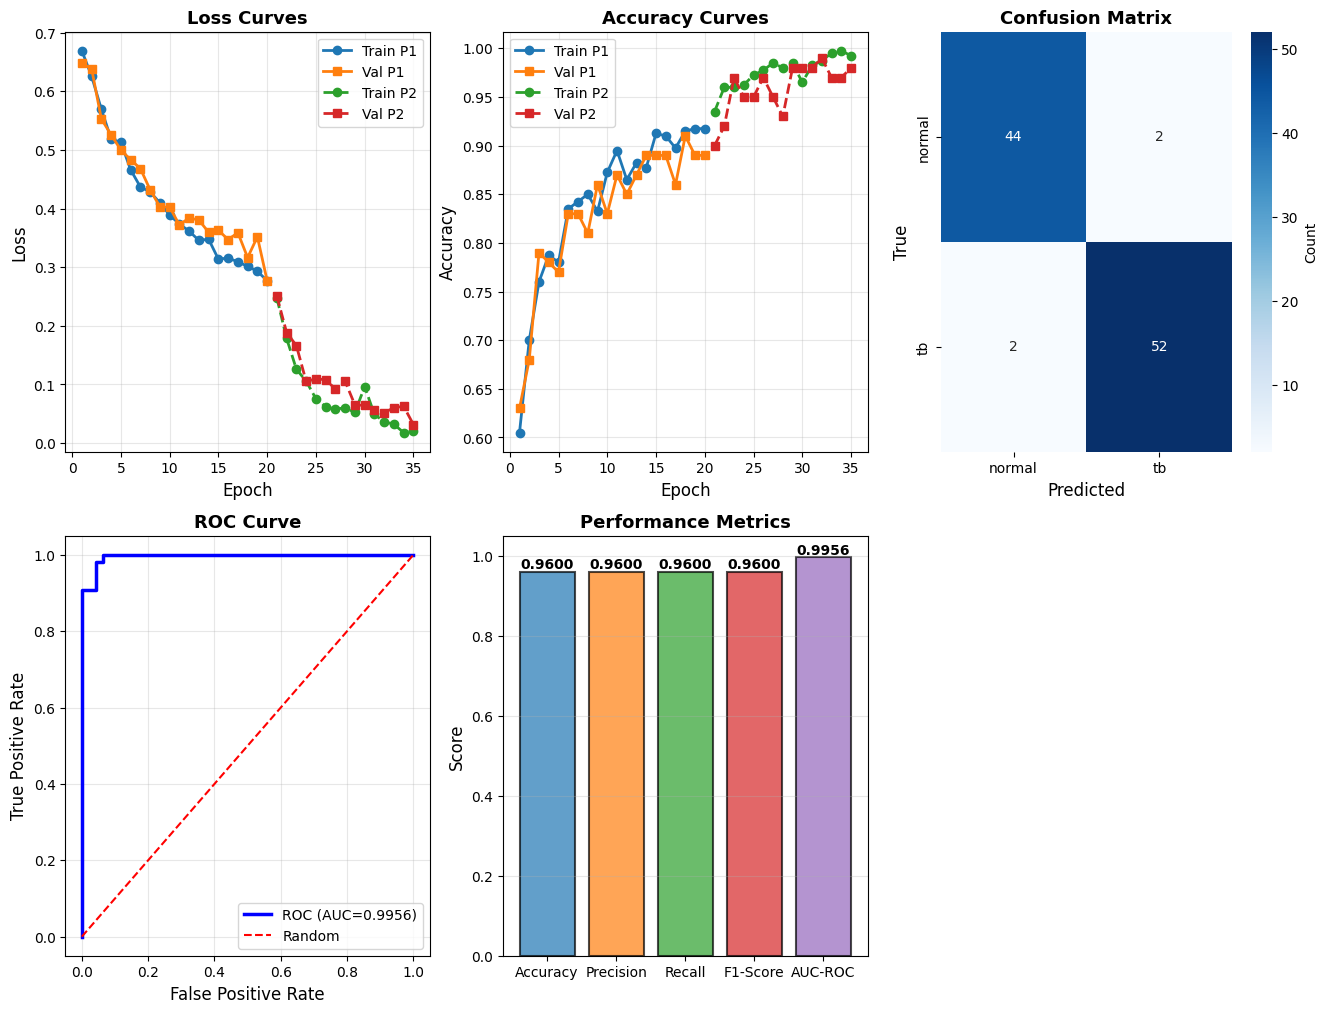

In [3]:
"""
Vision Transformer (ViT-Base) Binary Medical Imaging Classification
PyTorch Version | Normal vs TB | Google Colab Compatible
"""

import os, time, numpy as np, pandas as pd, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import vit_b_16
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report,
    roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score)
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ========================= CONFIG =========================
CONFIG = {
    "data_root": "/content/drive/MyDrive/data_For_research",
    "img_size": 224, "batch_size": 32, "seed": 42,
    "epochs_phase1": 20, "epochs_phase2": 15,
    "lr_phase1": 1e-4, "lr_phase2": 1e-5,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    "unfreeze_ratio": 0.25,
}

np.random.seed(CONFIG['seed'])
torch.manual_seed(CONFIG['seed'])
if torch.cuda.is_available(): torch.cuda.manual_seed_all(CONFIG['seed'])

# ========================= DATA AUGMENTATION =========================
print("⏱️  Starting data augmentation setup...")
augmentation_start = time.time()

train_transforms = transforms.Compose([
    transforms.Resize((CONFIG['img_size'], CONFIG['img_size'])),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomCrop(size=CONFIG['img_size']),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((CONFIG['img_size'], CONFIG['img_size'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(CONFIG['data_root'], transform=train_transforms)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(CONFIG['seed'])
)

train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'],
                         shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=CONFIG['batch_size'],
                       shuffle=False, num_workers=2, pin_memory=True)

augmentation_time = time.time() - augmentation_start
class_names = full_dataset.classes

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")
print(f"Augmentation setup time: {augmentation_time:.2f}s")

# ========================= MODEL INIT =========================
print("\n⏱️  Starting model initialization...")
init_start = time.time()

model = vit_b_16(weights='IMAGENET1K_V1')
num_classes = len(class_names)
model.heads.head = nn.Linear(768, num_classes)

for param in model.parameters():
    param.requires_grad = False
for param in model.heads.head.parameters():
    param.requires_grad = True

model = model.to(CONFIG['device'])
init_time = time.time() - init_start

print(f"Total params: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable (Phase 1): {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"Init time: {init_time:.2f}s")

# ========================= TRAINING FUNCTIONS =========================
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss, all_preds, all_labels = 0.0, [], []
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        with torch.no_grad():
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        pbar.set_postfix({'loss': loss.item()})
    return total_loss / len(loader), accuracy_score(all_labels, all_preds)

def val_epoch(model, loader, criterion, device):
    model.eval()
    total_loss, all_preds, all_labels, all_probs = 0.0, [], [], []
    with torch.no_grad():
        pbar = tqdm(loader, desc="Validation", leave=False)
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            pbar.set_postfix({'loss': loss.item()})
    return total_loss / len(loader), accuracy_score(all_labels, all_preds), all_preds, all_labels, all_probs

# ========================= PHASE 1 =========================
print("\n" + "="*80)
print("PHASE 1: Training Classifier Head (Backbone Frozen)")
print("="*80)

phase1_start = time.time()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=CONFIG['lr_phase1'])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, min_lr=1e-7)

history_phase1 = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
best_val_loss, patience_counter, patience = float('inf'), 0, 5

for epoch in range(CONFIG['epochs_phase1']):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, CONFIG['device'])
    val_loss, val_acc, _, _, _ = val_epoch(model, val_loader, criterion, CONFIG['device'])
    history_phase1['train_loss'].append(train_loss)
    history_phase1['val_loss'].append(val_loss)
    history_phase1['train_acc'].append(train_acc)
    history_phase1['val_acc'].append(val_acc)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}/{CONFIG['epochs_phase1']} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
    if val_loss < best_val_loss:
        best_val_loss, patience_counter = val_loss, 0
        best_model_phase1 = model.state_dict().copy()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_phase1)
            break

phase1_time = time.time() - phase1_start
print(f"\nPhase 1 time: {phase1_time:.2f}s")

# ========================= PHASE 2 =========================
print("\n" + "="*80)
print("PHASE 2: Fine-tuning Last 25% of Backbone")
print("="*80)

phase2_start = time.time()
total_layers = len([name for name, _ in model.named_parameters()])
unfreeze_count = max(1, int(total_layers * CONFIG['unfreeze_ratio']))
trainable_count = 0
for name, param in reversed(list(model.named_parameters())):
    if trainable_count < unfreeze_count:
        param.requires_grad = True
        trainable_count += 1
    else:
        param.requires_grad = False

print(f"Unfroze {trainable_count} layers")
print(f"Phase 2 trainable params: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=CONFIG['lr_phase2'])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, min_lr=1e-8)

history_phase2 = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
best_val_loss, patience_counter = float('inf'), 0

for epoch in range(CONFIG['epochs_phase2']):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, CONFIG['device'])
    val_loss, val_acc, _, _, _ = val_epoch(model, val_loader, criterion, CONFIG['device'])
    history_phase2['train_loss'].append(train_loss)
    history_phase2['val_loss'].append(val_loss)
    history_phase2['train_acc'].append(train_acc)
    history_phase2['val_acc'].append(val_acc)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}/{CONFIG['epochs_phase2']} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
    if val_loss < best_val_loss:
        best_val_loss, patience_counter = val_loss, 0
        best_model_phase2 = model.state_dict().copy()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_phase2)
            break

phase2_time = time.time() - phase2_start
print(f"\nPhase 2 time: {phase2_time:.2f}s")

# ========================= EVALUATION =========================
print("\n" + "="*80)
print("FINAL EVALUATION")
print("="*80)

inference_start = time.time()
model.eval()
all_preds, all_labels, all_probs = [], [], []
with torch.no_grad():
    for images, labels in tqdm(val_loader, desc="Evaluating"):
        images = images.to(CONFIG['device'])
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())
        all_probs.extend(probs.cpu().numpy())

inference_time = time.time() - inference_start

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

print(f"Inference time: {inference_time:.2f}s")

# ========================= METRICS =========================
y_probs_for_roc = all_probs[:, 1] if num_classes == 2 else all_probs[:, 1]
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
auc_roc = roc_auc_score(all_labels, y_probs_for_roc)

print(f"\n📊 METRICS")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(cm)

# ========================= TIMING =========================
total_time = augmentation_time + init_time + phase1_time + phase2_time + inference_time
print("\n" + "="*80)
print("⏱️  TIMING SUMMARY")
print("="*80)
print(f"Augmentation Setup:  {augmentation_time:7.2f}s ({augmentation_time/total_time*100:5.1f}%)")
print(f"Model Init:          {init_time:7.2f}s ({init_time/total_time*100:5.1f}%)")
print(f"Phase 1 Training:    {phase1_time:7.2f}s ({phase1_time/total_time*100:5.1f}%)")
print(f"Phase 2 Fine-tune:   {phase2_time:7.2f}s ({phase2_time/total_time*100:5.1f}%)")
print(f"Inference:           {inference_time:7.2f}s ({inference_time/total_time*100:5.1f}%)")
print("-" * 80)
print(f"Total Pipeline:      {total_time:7.2f}s")
print("="*80)

# ========================= VISUALIZATIONS =========================
print("\n📈 Generating visualizations...")

fig = plt.figure(figsize=(16, 12))

# Loss curves
ax1 = plt.subplot(2, 3, 1)
epochs_p1 = list(range(1, len(history_phase1['train_loss']) + 1))
epochs_p2 = list(range(len(history_phase1['train_loss']) + 1,
                        len(history_phase1['train_loss']) + len(history_phase2['train_loss']) + 1))
ax1.plot(epochs_p1, history_phase1['train_loss'], 'o-', label='Train P1', linewidth=2)
ax1.plot(epochs_p1, history_phase1['val_loss'], 's-', label='Val P1', linewidth=2)
ax1.plot(epochs_p2, history_phase2['train_loss'], 'o--', label='Train P2', linewidth=2)
ax1.plot(epochs_p2, history_phase2['val_loss'], 's--', label='Val P2', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss Curves', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2 = plt.subplot(2, 3, 2)
ax2.plot(epochs_p1, history_phase1['train_acc'], 'o-', label='Train P1', linewidth=2)
ax2.plot(epochs_p1, history_phase1['val_acc'], 's-', label='Val P1', linewidth=2)
ax2.plot(epochs_p2, history_phase2['train_acc'], 'o--', label='Train P2', linewidth=2)
ax2.plot(epochs_p2, history_phase2['val_acc'], 's--', label='Val P2', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Accuracy Curves', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Confusion matrix
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
            yticklabels=class_names, ax=ax3, cbar_kws={'label': 'Count'})
ax3.set_xlabel('Predicted', fontsize=12)
ax3.set_ylabel('True', fontsize=12)
ax3.set_title('Confusion Matrix', fontsize=13, fontweight='bold')

# ROC curve
ax4 = plt.subplot(2, 3, 4)
fpr, tpr, _ = roc_curve(all_labels, y_probs_for_roc)
ax4.plot(fpr, tpr, 'b-', linewidth=2.5, label=f'ROC (AUC={auc_roc:.4f})')
ax4.plot([0, 1], [0, 1], 'r--', linewidth=1.5, label='Random')
ax4.set_xlabel('False Positive Rate', fontsize=12)
ax4.set_ylabel('True Positive Rate', fontsize=12)
ax4.set_title('ROC Curve', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Metrics bar
ax5 = plt.subplot(2, 3, 5)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
metrics_values = [accuracy, precision, recall, f1, auc_roc]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = ax5.bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Score', fontsize=12)
ax5.set_title('Performance Metrics', fontsize=13, fontweight='bold')
ax5.set_ylim([0, 1.05])
for bar, val in zip(bars, metrics_values):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

